<a href="https://colab.research.google.com/github/DGKobelev/Home/blob/main/intern_2/V3_semantic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Подключение**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


**Загрузка датасета**

In [ ]:
import os
from google.colab import files

# Создание директории для сохранения датасета, если она не существует
save_path = "/content/drive/MyDrive/Стажировка/Dataset"
if not os.path.exists(save_path):
    os.makedirs(save_path)

# Загрузка файлов в среду выполнения Colab
uploaded = files.upload()

# Проверка успешности загрузки
if len(uploaded) > 0:
    # Сохранение загруженных файлов в созданную директорию
    for filename, data in uploaded.items():
        file_path = os.path.join(save_path, filename)
        with open(file_path, "wb") as f:
            f.write(data)
        print("Файл успешно сохранен в", file_path)

    # Удаление файлов из текущей директории (/content), если они были загружены
    for filename in os.listdir('/content'):
        if filename in uploaded.keys():
            os.remove(os.path.join('/content', filename))

else:
    print("Не удалось загрузить файлы.")

Saving AI_dataset_2022-3Q.xlsx to AI_dataset_2022-3Q.xlsx
Saving AI_dataset_2022-4Q.xlsx to AI_dataset_2022-4Q.xlsx
Saving AI_dataset_2023-1Q.xlsx to AI_dataset_2023-1Q.xlsx
Saving AI_dataset_2023-2Q.xlsx to AI_dataset_2023-2Q.xlsx
Saving AI_dataset_2023-3Q.xlsx to AI_dataset_2023-3Q.xlsx
Saving AI_dataset_2023-4Q.xlsx to AI_dataset_2023-4Q.xlsx
Saving AI_dataset_2024-1Q.xlsx to AI_dataset_2024-1Q.xlsx
Saving AI_dataset_2024-2Q(28.05.2024).xlsx to AI_dataset_2024-2Q(28.05.2024).xlsx
Saving AI_dataset_2024-2Q(29.05.2024).xlsx to AI_dataset_2024-2Q(29.05.2024).xlsx
Saving AI_dataset_2024-2Q(30.05.2024-03.06.2024).xlsx to AI_dataset_2024-2Q(30.05.2024-03.06.2024).xlsx
Файл успешно сохранен в /content/drive/MyDrive/Стажировка/Dataset/AI_dataset_2022-3Q.xlsx
Файл успешно сохранен в /content/drive/MyDrive/Стажировка/Dataset/AI_dataset_2022-4Q.xlsx
Файл успешно сохранен в /content/drive/MyDrive/Стажировка/Dataset/AI_dataset_2023-1Q.xlsx
Файл успешно сохранен в /content/drive/MyDrive/Стажировк

**Объединение файлов**

In [ ]:
!pip install openpyxl


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 1.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import os

# Указать путь к папке с файлами
folder_path = '/content/drive/MyDrive/Стажировка/Dataset'

# Создать список для хранения DataFrame
dataframes = []
columns_set = set()

# Пройтись по всем файлам в папке и прочитать их
for filename in os.listdir(folder_path):
    if filename.endswith('.xlsx'):
        file_path = os.path.join(folder_path, filename)
        df = pd.read_excel(file_path)
        dataframes.append(df)
        columns_set.update(df.columns)

# Преобразовать set в список для сохранения порядка столбцов
all_columns = list(columns_set)

# Заполнить недостающие столбцы NaN значениями
for i, df in enumerate(dataframes):
    missing_cols = set(all_columns) - set(df.columns)
    for col in missing_cols:
        df[col] = pd.NA
    # Переупорядочить столбцы в соответствии с all_columns
    dataframes[i] = df[all_columns]

# Объединить все DataFrame в один
combined_df = pd.concat(dataframes, ignore_index=True)

# Сохранить объединённый DataFrame в новый файл с использованием openpyxl
combined_df.to_excel('/content/drive/MyDrive/Стажировка/Dataset/combined_file.xlsx', index=False, engine='openpyxl')


/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


**Преобразование в формат csv**

In [ ]:
import pandas as pd

# Загрузка объединённого файла Excel
combined_df = pd.read_excel('/content/drive/MyDrive/Стажировка/Dataset/combined_file.xlsx', engine='openpyxl')

# Сохранение в формат CSV
csv_file_path = '/content/drive/MyDrive/Стажировка/Dataset/combined_file.csv'
combined_df.to_csv(csv_file_path, index=False, encoding='utf-8')

print(f"Файл успешно сохранен в формате CSV: {csv_file_path}")

# Просмотр первых нескольких строк DataFrame
print(combined_df.head())


Файл успешно сохранен в формате CSV: /content/drive/MyDrive/Стажировка/Dataset/combined_file.csv
             Portal User Group (Do Not Modify) Modified On        Case Title  \
0    MARKETING ACTIONS (Coral)         2022-08-02 12:18:37  REQ-43487-QT9X7U   
1  REGION SALES Kazan (Sunmar)         2022-09-01 16:11:48  REQ-44386-T31OGO   
2    MARKETING ACTIONS (Coral)         2022-08-02 12:19:15  REQ-44509-NHF15Z   
3                CLAIM (Coral)         2022-09-08 13:39:00  REQ-51538-A5PW8K   
4                DEP3 (Sunmar)         2022-08-04 19:30:52  REQ-63665-260552   

   EE Agency User Id (Agency User) (Contact) Place (Agency) (Agency)  \
0                                      53087                Isetskoe   
1                                      46395                   Kazan   
2                                      26425               Ramenskoe   
3                                      92469             Chelyabinsk   
4                                      96207                  

Удаление столбцов: (Do Not Modify) Case, (Do Not Modify) Row Checksum, (Do Not Modify) Modified On, Created On, Reservation Date (Reservation) (Voucher), Reservation Begin Date (Reservation) (Voucher), Reservation End Date (Reservation) (Voucher).

In [ ]:
import pandas as pd

# Загрузка файла CSV
combined_df = pd.read_csv('/content/drive/MyDrive/Стажировка/Dataset/combined_file.csv')

# Удаление указанных столбцов
columns_to_drop = [
    '(Do Not Modify) Case',
    '(Do Not Modify) Row Checksum',
    '(Do Not Modify) Modified On',
    'Created On',
    'Reservation Date (Reservation) (Voucher)',
    'Reservation Begin Date (Reservation) (Voucher)',
    'Reservation End Date (Reservation) (Voucher)'
]
combined_df = combined_df.drop(columns=columns_to_drop)

# Удаление слов "(Coral)" и "(Sunmar)" из столбца Portal User Group
combined_df['Portal User Group'] = combined_df['Portal User Group'].str.replace(r'\(Coral\)', '', regex=True)
combined_df['Portal User Group'] = combined_df['Portal User Group'].str.replace(r'\(Sunmar\)', '', regex=True)

# Удаление строк с пустыми значениями в столбцах Description и Portal User Group
combined_df = combined_df.dropna(subset=['Description', 'Portal User Group'])

# Сохранение объединенного DataFrame в формате CSV
combined_df.to_csv('/content/drive/MyDrive/Стажировка/Dataset/combined_part_file.csv', index=False)


**Разделение combined_part_file.csv по столбцу Operator Voucher Id (Reservation) (Voucher) на два файла.**

In [ ]:
import pandas as pd

# Загрузка файла CSV
combined_df = pd.read_csv('/content/drive/MyDrive/Стажировка/Dataset/combined_part_file.csv')

# Разделение на два DataFrame: с пустыми и не с пустыми значениями в столбце Operator Voucher Id (Reservation) (Voucher)
df_with_voucher = combined_df.dropna(subset=['Operator Voucher Id (Reservation) (Voucher)'])
df_without_voucher = combined_df[combined_df['Operator Voucher Id (Reservation) (Voucher)'].isna()]

# Сохранение разделенных DataFrame в формате CSV
df_with_voucher.to_csv('/content/drive/MyDrive/Стажировка/Dataset/with_voucher.csv', index=False)
df_without_voucher.to_csv('/content/drive/MyDrive/Стажировка/Dataset/without_voucher.csv', index=False)


Группировка по 'Portal User Group' и подсчет количества обращений ('Description') для каждой группы.

In [ ]:
import pandas as pd

# Загрузка файла CSV
processed_df = pd.read_csv('/content/drive/MyDrive/Стажировка/Dataset/without_voucher.csv')

# Группировка по 'Portal User Group' и подсчет количества обращений ('Description') для каждой группы
grouped_counts = processed_df.groupby('Portal User Group')['Description'].count().reset_index(name='Общее количество обращений')

# Вывод таблицы на экран
print("Таблица количества обращений по классам:")
print(grouped_counts)

# Вычисление общего среднего количества обращений по всем классам
overall_average = grouped_counts['Общее количество обращений'].mean()

# Вывод значения на экран
print(f"\nОбщее среднее количество обращений по классам: {overall_average}")

# Сохранение таблицы с количеством обращений по классам в файл XLSX
output_xlsx_path = '/content/drive/MyDrive/Стажировка/Dataset/grouped_counts.xlsx'
grouped_counts.to_excel(output_xlsx_path, index=False, engine='openpyxl')

print(f"Таблица количества обращений по классам сохранена в файл: {output_xlsx_path}")


Таблица количества обращений по классам:
             Portal User Group  Общее количество обращений
0          #TEST#CORAL#RUSSIA#                           2
1                  ACCOUNTING                          543
2              ACCOUNTING ATM                           76
3        ACCOUNTING CONTRACTS                         7868
4              ACCOUNTING MIR                            9
..                         ...                         ...
112                       SFC                            4
113                      VISA                          938
114                 VISA HELP                            2
115  elite@ELITE RESERVATIONS                         3262
116     special@ELITE SERVICE                         4073

[117 rows x 2 columns]

Общее среднее количество обращений по классам: 704.5470085470085
Таблица количества обращений по классам сохранена в файл: /content/drive/MyDrive/Стажировка/Dataset/grouped_counts.xlsx


Вывод на экран названий столбцов.

In [ ]:
import pandas as pd

# Загрузка данных из CSV файла
file_path = '/content/drive/MyDrive/Стажировка/Dataset/without_voucher.csv'
data = pd.read_csv(file_path)

# Удаление столбца 'Operator Voucher Id (Reservation) (Voucher)'
data.drop(columns=['Operator Voucher Id (Reservation) (Voucher)'], inplace=True)

# Вывод названий столбцов после удаления
print("Названия столбцов после удаления:")
print(data.columns)

# Вывод количества столбцов после удаления
print(f"Всего столбцов после удаления: {len(data.columns)}")

# Сохранение обновленного датасета в новый CSV файл
new_file_path = '/content/drive/MyDrive/Стажировка/Semantic_2/without_voucher_cleaned.csv'
data.to_csv(new_file_path, index=False)

print(f"Обновленный файл сохранен как: {new_file_path}")


Названия столбцов после удаления:
Index(['Portal User Group', 'Case Title',
       'EE Agency User Id (Agency User) (Contact)', 'Place (Agency) (Agency)',
       'Elite Status (Reservation) (Voucher)', 'Company (Agency) (Agency)',
       'Enter The System (Agency) (Agency)', 'To Area (Reservation) (Voucher)',
       'Reservation Type (Reservation) (Voucher)', 'Description',
       'Kurator Group (Agency) (Agency)', 'EE Id (Agency) (Agency)',
       'Agency Type Id (Agency) (Agency)', 'Process Phase',
       'Reservation Class (Reservation) (Voucher)',
       'Is VIP (Reservation) (Voucher)', 'Business Line',
       'From Area (Reservation) (Voucher)'],
      dtype='object')
Всего столбцов после удаления: 18
Обновленный файл сохранен как: /content/drive/MyDrive/Стажировка/Semantic_2/without_voucher_cleaned.csv


**Очистка и нормализация текста с помощью pymorphy2.**

In [ ]:
!pip install pymorphy2

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 30.5 MB/s eta 0:00:00
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13704 sha256=559e5a441ef0e6380dccdce41415669041d4bc1429750ab2132844ad1305a25c
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


In [ ]:
import pandas as pd
import pymorphy2
import re
from tqdm import tqdm
import nltk
from nltk.corpus import stopwords

# Активация tqdm для pandas
tqdm.pandas()

# Инициализация анализатора pymorphy2
ma = pymorphy2.MorphAnalyzer()

# Загрузка стоп-слов из NLTK
nltk.download('stopwords')
stop_words = set(stopwords.words('russian'))

# Функция для очистки и нормализации текста
def clean_text(text):
    text = text.replace("\\", " ").replace(u"╚", " ").replace(u"╩", " ")
    text = text.lower()
    text = re.sub('-\s*\r\n|\r\n', '', text)  # регулярное выражение для удаления переносов строк
    text = " ".join(ma.parse(word)[0].normal_form for word in text.split())
    text = re.sub('\s+', ' ', text)  # замена нескольких пробелов одним
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

# Загрузка данных
file_path = '/content/drive/MyDrive/Стажировка/Semantic_2/without_voucher_cleaned.csv'
combined_df = pd.read_csv(file_path)

# Применение функции clean_text ко всем строковым столбцам, кроме 'Portal User Group'
for column in combined_df.select_dtypes(include=['object']).columns:
    if column != 'Portal User Group':
        combined_df[column] = combined_df[column].astype(str).progress_apply(clean_text)

# Создание словаря, содержащего уникальные группы из DataFrame
categories = {}
unique_groups = tqdm(combined_df['Portal User Group'].unique(), desc="Создание словаря групп")
for key, value in enumerate(unique_groups):
    categories[value] = key + 1

# Запись в новую колонку числовое обозначение групп назначения
combined_df['portal_user_group_code'] = combined_df['Portal User Group'].map(categories)

# Подсчёт общего количества уникальных категорий
total_categories = len(categories)
print('Всего категорий: {}'.format(total_categories))

# Сохранение очищенного DataFrame в формате CSV
output_csv_path = '/content/drive/MyDrive/Стажировка/Semantic_2/cleaned_file.csv'
combined_df.to_csv(output_csv_path, index=False)
print("DataFrame успешно сохранен в формате CSV.")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
Создание словаря групп: 100%|██████████| 117/117 [00:00<00:00, 271573.64it/s]


Всего категорий: 117
DataFrame успешно сохранен в формате CSV.


Новый столбец *portal_user_group_code* содержит числовые обозначения групп назначения.


  Удаляем столбцы содержащие наименования:
   * 'Case Title'
   * 'Business Line'
   * EE Agency User Id (Agency User) (Contact)

In [ ]:
import pandas as pd

# Путь к файлу
file_path = '/content/drive/MyDrive/Стажировка/Semantic_2/cleaned_file.csv'

# Загрузка данных из CSV
data = pd.read_csv(file_path)

# Удаление указанных столбцов
columns_to_drop = ['Case Title', 'Business Line', 'EE Agency User Id (Agency User) (Contact)']
data = data.drop(columns=columns_to_drop)

# Сохранение обновленного DataFrame обратно в CSV
data.to_csv(file_path, index=False)

print("Столбцы успешно удалены и файл сохранен.")


Столбцы успешно удалены и файл сохранен.


In [ ]:
import pandas as pd

# Путь к файлу
file_path = '/content/drive/MyDrive/Стажировка/Semantic_2/cleaned_file.csv'

# Загрузка данных из CSV
data = pd.read_csv(file_path)

# Получение и вывод названий столбцов
remaining_columns = data.columns
print("Оставшиеся названия столбцов:")
for column in remaining_columns:
    print(column)


Оставшиеся названия столбцов:
Portal User Group
Place (Agency) (Agency)
Elite Status (Reservation) (Voucher)
Company (Agency) (Agency)
Enter The System (Agency) (Agency)
To Area (Reservation) (Voucher)
Reservation Type (Reservation) (Voucher)
Description
Kurator Group (Agency) (Agency)
EE Id (Agency) (Agency)
Agency Type Id (Agency) (Agency)
Process Phase
Reservation Class (Reservation) (Voucher)
Is VIP (Reservation) (Voucher)
From Area (Reservation) (Voucher)
portal_user_group_code


In [ ]:
!pip install tqdm
!pip install openpyxl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 1.8 MB/s eta 0:00:00


Заменяем сокращения на полные формы в столбце Description с использованием функции replace_abbreviations.

Удаление нежелательных знаков, которые выборочно нашел.

Удаление нежелательных знаков и малозначимых слов (таких как приветствия и вежливые обращения).

Замена сокращений на полные формы в русском языке.

**Далее при каждой обработке данных добавляются столбцы.**

**Предобработка данных Токенизация.**

Используется библиотека SpaCy для ***определения границ предложений и словоформ***.

In [ ]:
!pip install spacy
!python -m spacy download ru_core_news_sm
!python -m spacy download en_core_web_sm
!pip install langdetect


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 80.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 901.2 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 30.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('ru_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 103.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
     ━━

Обработка текста, содержащего как русский, так и английский текст.



In [ ]:
import spacy
import pandas as pd
from tqdm import tqdm
from langdetect import detect, LangDetectException

# Активация tqdm для pandas
tqdm.pandas()

# Загрузка моделей SpaCy для русского и английского языков
nlp_ru = spacy.load('ru_core_news_sm')
nlp_en = spacy.load('en_core_web_sm')

# Функция для токенизации текста
def tokenize_text(text):
    try:
        language = detect(text)
    except:
        language = 'unknown'

    if language == 'ru':
        doc = nlp_ru(text)
    elif language == 'en':
        doc = nlp_en(text)
    else:
        return []

    sentences = []
    for sent in doc.sents:
        tokens = [token.text for token in sent]
        sentences.append(tokens)
    return sentences

# Загрузка данных
file_path = '/content/drive/MyDrive/Стажировка/Semantic_2/expanded_file.csv'
combined_df = pd.read_csv(file_path)

# Применение токенизации ко всем строковым столбцам, кроме 'Portal User Group' и 'portal_user_group_code'
for column in combined_df.select_dtypes(include=['object']).columns:
    if column not in ['Portal User Group', 'portal_user_group_code']:
        combined_df[column + '_tokens'] = combined_df[column].astype(str).progress_apply(tokenize_text)

# Сохранение DataFrame с токенизацией в формате CSV
output_csv_path = '/content/drive/MyDrive/Стажировка/Semantic_2/tokenized_file.csv'
combined_df.to_csv(output_csv_path, index=False)
print("DataFrame с токенизацией успешно сохранен в формате CSV.")


100%|██████████| 82432/82432 [03:52<00:00, 354.87it/s]


DataFrame с токенизацией успешно сохранен в формате CSV.


In [ ]:
import pandas as pd

# Путь к файлу
file_path = '/content/drive/MyDrive/Стажировка/Semantic_2/tokenized_file.csv'

# Загрузка данных из CSV файла
combined_df = pd.read_csv(file_path)

# Вывод списка всех столбцов
print("Список всех столбцов в файле:")
for column in combined_df.columns:
    print(column)

# Вывод списка добавленных столбцов
added_columns = [column for column in combined_df.columns if column.endswith('_tokens')]
print("\nСписок добавленных столбцов:")
for column in added_columns:
    print(column)

# Вывод количества столбцов
print(f"\nВсего столбцов: {len(combined_df.columns)}")
print(f"Добавленных столбцов: {len(added_columns)}")


Список всех столбцов в файле:
Portal User Group
Place (Agency) (Agency)
Elite Status (Reservation) (Voucher)
Company (Agency) (Agency)
Enter The System (Agency) (Agency)
To Area (Reservation) (Voucher)
Reservation Type (Reservation) (Voucher)
Description
Kurator Group (Agency) (Agency)
EE Id (Agency) (Agency)
Agency Type Id (Agency) (Agency)
Process Phase
Reservation Class (Reservation) (Voucher)
Is VIP (Reservation) (Voucher)
From Area (Reservation) (Voucher)
portal_user_group_code
Place (Agency) (Agency)_tokens
Company (Agency) (Agency)_tokens
Enter The System (Agency) (Agency)_tokens
Description_tokens
Kurator Group (Agency) (Agency)_tokens
Agency Type Id (Agency) (Agency)_tokens
Process Phase_tokens

Список добавленных столбцов:
Place (Agency) (Agency)_tokens
Company (Agency) (Agency)_tokens
Enter The System (Agency) (Agency)_tokens
Description_tokens
Kurator Group (Agency) (Agency)_tokens
Agency Type Id (Agency) (Agency)_tokens
Process Phase_tokens

Всего столбцов: 23
Добавленных 

**Лексический анализ с обработкой на русском и английском языках.**

In [ ]:
!pip install langdetect
!pip install googletrans==4.0.0-rc1


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 3.2 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17397 sha256=a004e150bac98a8252afe9f535095a8db66e1819fc254f0b3b7b496eade4c42f
  Stored in directory: /root/.cache/pip/wheels/c0/59/9f/7372f0cf70160fe61b528532e1a7c8498c4becd6bcffb022de
Successfully built googletrans
  Attempting uninstall: idna
    Found existing installation: idna 3.7
    Uninstalling idna-3.7:
      Success

In [ ]:
!pip install spacy
!python -m spacy download ru_core_news_sm
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 36.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('ru_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 63.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


Проводим лексический анализ всех столбцов с сохранением промежуточного результата на случай сбоя. Для сохранения теперь **используем формат Parquet.**

In [ ]:
import spacy.cli

# Установка моделей SpaCy для русского и английского языков
spacy.cli.download("ru_core_news_sm")
spacy.cli.download("en_core_web_sm")

print("Перезапустите runtime после завершения установки моделей.")


✔ Download and installation successful
You can now load the package via spacy.load('ru_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
Перезапустите runtime после завершения установки моделей.


In [ ]:
import pandas as pd
from tqdm import tqdm
import re
from langdetect import detect
from googletrans import Translator
import spacy
import os
import json

# Активация tqdm для pandas
tqdm.pandas()

# Загрузка моделей SpaCy для русского и английского языков
spacy.cli.download("ru_core_news_sm")
spacy.cli.download("en_core_web_sm")

nlp_ru = spacy.load('ru_core_news_sm')
nlp_en = spacy.load('en_core_web_sm')
translator = Translator()

# Загрузка данных из файла tokenized_file.csv или parquet (если есть промежуточный результат)
intermediate_path = '/content/drive/MyDrive/Стажировка/Semantic_2/intermediate_result.parquet'
updated_csv_path = '/content/drive/MyDrive/Стажировка/Semantic_2/tokenized_file.csv'
progress_file_path = '/content/drive/MyDrive/Стажировка/Semantic_2/progress.json'

if os.path.exists(intermediate_path):
    df = pd.read_parquet(intermediate_path)
else:
    df = pd.read_csv(updated_csv_path)

# Функция для очистки текста от нежелательных символов и перевода на русский язык
def clean_and_translate(text):
    text = re.sub(r'[!\"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~\t\n]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip().lower()
    try:
        lang = detect(text)
        if lang == 'en':
            translated = translator.translate(text, src='en', dest='ru')
            return translated.text
    except:
        return text
    return text

# Функция для лексического анализа текста
def lexical_analysis(text):
    tokens = []
    seen_tokens = set()

    # Определение языка текста
    try:
        lang = detect(text)
    except:
        lang = 'unknown'

    # Обработка текста русской моделью, если текст на русском
    if lang == 'ru':
        doc = nlp_ru(text)
    elif lang == 'en':
        doc = nlp_en(text)
    else:
        return text  # Возвращаем исходный текст для текстов с неопределенным языком

    for token in doc:
        if token.text not in seen_tokens:
            tokens.append(token.lemma_)
            seen_tokens.add(token.text)

    return ' '.join(tokens)

# Список столбцов для очистки, нормализации и лексического анализа (исключая 'Portal User Group' и 'portal_user_group_code')
columns_to_process = [
    'Place (Agency) (Agency)', 'Elite Status (Reservation) (Voucher)', 'Company (Agency) (Agency)',
    'Enter The System (Agency) (Agency)', 'To Area (Reservation) (Voucher)',
    'Reservation Type (Reservation) (Voucher)', 'Description', 'Kurator Group (Agency) (Agency)',
    'EE Id (Agency) (Agency)', 'Agency Type Id (Agency) (Agency)', 'Process Phase',
    'Reservation Class (Reservation) (Voucher)', 'Is VIP (Reservation) (Voucher)',
    'From Area (Reservation) (Voucher)'
]

# Загрузка информации о прогрессе, если она существует
if os.path.exists(progress_file_path):
    with open(progress_file_path, 'r') as f:
        progress_data = json.load(f)
else:
    progress_data = {column: False for column in columns_to_process}

# Очистка, нормализация текста и лексический анализ в указанных столбцах
for column in columns_to_process:
    if progress_data.get(column, False):
        print(f"Столбец {column} уже обработан, пропускаем.")
        continue

    print(f"Обработка столбца: {column}")
    df[column + '_cleaned'] = df[column].astype(str).progress_apply(clean_and_translate)
    df[column + '_lexical'] = df[column + '_cleaned'].progress_apply(lexical_analysis)

    # Обновление прогресса
    progress_data[column] = True
    with open(progress_file_path, 'w') as f:
        json.dump(progress_data, f)

    # Сохранение промежуточного результата после обработки каждого столбца
    df.to_parquet(intermediate_path, index=False)

# Сохранение данных в новый файл Parquet
final_parquet_path = '/content/drive/MyDrive/Стажировка/Semantic_2/lexical_analysis_file.parquet'
df.to_parquet(final_parquet_path, index=False)

# Удаление файла прогресса после завершения обработки
os.remove(progress_file_path)

print(f"Данные успешно очищены и сохранены в формате Parquet в файл {final_parquet_path}.")


✔ Download and installation successful
You can now load the package via spacy.load('ru_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
Обработка столбца: Place (Agency) (Agency)


100%|██████████| 82432/82432 [11:26<00:00, 120.09it/s]


Обработка столбца: Elite Status (Reservation) (Voucher)


100%|██████████| 82432/82432 [01:17<00:00, 1060.85it/s]


Обработка столбца: Company (Agency) (Agency)


100%|██████████| 82432/82432 [07:52<00:00, 174.58it/s]


Обработка столбца: Enter The System (Agency) (Agency)


100%|██████████| 82432/82432 [01:34<00:00, 870.95it/s]


Обработка столбца: To Area (Reservation) (Voucher)


100%|██████████| 82432/82432 [01:17<00:00, 1059.80it/s]


Обработка столбца: Reservation Type (Reservation) (Voucher)


100%|██████████| 82432/82432 [01:17<00:00, 1067.16it/s]


Обработка столбца: Description


100%|██████████| 82432/82432 [22:37<00:00, 60.74it/s]


Обработка столбца: Kurator Group (Agency) (Agency)


100%|██████████| 82432/82432 [15:04<00:00, 91.15it/s]


Обработка столбца: EE Id (Agency) (Agency)


100%|██████████| 82432/82432 [00:02<00:00, 31043.53it/s]


Обработка столбца: Agency Type Id (Agency) (Agency)


100%|██████████| 82432/82432 [12:55<00:00, 106.26it/s]


Обработка столбца: Process Phase


100%|██████████| 82432/82432 [03:50<00:00, 358.19it/s]


Обработка столбца: Reservation Class (Reservation) (Voucher)


100%|██████████| 82432/82432 [01:18<00:00, 1051.98it/s]


Обработка столбца: Is VIP (Reservation) (Voucher)


100%|██████████| 82432/82432 [01:17<00:00, 1057.25it/s]


Обработка столбца: From Area (Reservation) (Voucher)


100%|██████████| 82432/82432 [01:18<00:00, 1045.68it/s]


Данные успешно очищены и сохранены в формате Parquet в файл /content/drive/MyDrive/Стажировка/Semantic_2/lexical_analysis_file.parquet.


**Морфологический анализ.**

Определение вероятных лемм для каждой словоформы, стемминг.

In [ ]:
import spacy
import pandas as pd
from tqdm import tqdm
from langdetect import detect
import os
import json

# Активация tqdm для pandas
tqdm.pandas()

# Загрузка моделей SpaCy для русского и английского языков
spacy.cli.download("ru_core_news_sm")
spacy.cli.download("en_core_web_sm")

nlp_ru = spacy.load('ru_core_news_sm')
nlp_en = spacy.load('en_core_web_sm')

# Функция для морфологического анализа текста
def morphological_analysis(text):
    tokens = []
    seen_tokens = set()

    # Определение языка текста
    try:
        lang = detect(text)
    except:
        lang = 'unknown'

    # Обработка текста русской моделью, если текст на русском
    if lang == 'ru':
        doc = nlp_ru(text)
    elif lang == 'en':
        doc = nlp_en(text)
    else:
        return tokens  # Возвращаем пустой список для текстов с неопределенным языком

    for token in doc:
        if token.text not in seen_tokens:
            tokens.append({
                'text': token.text,
                'lemma': token.lemma_,
                'pos': token.pos_,
                'tag': token.tag_,
                'dep': token.dep_,
                'shape': token.shape_,
                'is_alpha': token.is_alpha,
                'is_stop': token.is_stop,
                'stem': token.lemma_  # В SpaCy лемма используется как стемминг
            })
            seen_tokens.add(token.text)

    return tokens

# Загрузка данных из файла lexical_analysis_file.parquet или parquet (если есть промежуточный результат)
intermediate_path = '/content/drive/MyDrive/Стажировка/Semantic_2/intermediate_morphological_result.parquet'
final_parquet_path = '/content/drive/MyDrive/Стажировка/Semantic_2/morphological_analysis_file.parquet'
progress_file_path = '/content/drive/MyDrive/Стажировка/Semantic_2/progress_morph.json'

if os.path.exists(intermediate_path):
    df = pd.read_parquet(intermediate_path)
else:
    df = pd.read_parquet('/content/drive/MyDrive/Стажировка/Semantic_2/lexical_analysis_file.parquet')

# Список столбцов для морфологического анализа (исключая Portal User Group и portal_user_group_code)
columns_to_process = [
    'Place (Agency) (Agency)', 'Elite Status (Reservation) (Voucher)', 'Company (Agency) (Agency)',
    'Enter The System (Agency) (Agency)', 'To Area (Reservation) (Voucher)',
    'Reservation Type (Reservation) (Voucher)', 'Description', 'Kurator Group (Agency) (Agency)',
    'EE Id (Agency) (Agency)', 'Agency Type Id (Agency) (Agency)', 'Process Phase',
    'Reservation Class (Reservation) (Voucher)', 'Is VIP (Reservation) (Voucher)',
    'From Area (Reservation) (Voucher)'
]

# Загрузка информации о прогрессе, если она существует
if os.path.exists(progress_file_path):
    with open(progress_file_path, 'r') as f:
        progress_data = json.load(f)
else:
    progress_data = {column: False for column in columns_to_process}

# Применение функции morphological_analysis к указанным столбцам и добавление новых столбцов
for column in columns_to_process:
    if progress_data.get(column, False):
        print(f"Столбец {column} уже обработан, пропускаем.")
        continue

    print(f"Обработка столбца: {column}")
    df[column + '_morph'] = df[column].astype(str).progress_apply(morphological_analysis)

    # Обновление прогресса
    progress_data[column] = True
    with open(progress_file_path, 'w') as f:
        json.dump(progress_data, f)

    # Сохранение промежуточного результата после обработки каждого столбца
    df.to_parquet(intermediate_path, index=False)

# Сохранение очищенных данных в новый файл Parquet
df.to_parquet(final_parquet_path, index=False)

# Удаление файла прогресса после завершения обработки
os.remove(progress_file_path)

print(f"DataFrame успешно сохранен в формате Parquet в файл {final_parquet_path}.")


✔ Download and installation successful
You can now load the package via spacy.load('ru_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
Обработка столбца: Place (Agency) (Agency)


100%|██████████| 82432/82432 [11:11<00:00, 122.79it/s]


Обработка столбца: Elite Status (Reservation) (Voucher)


100%|██████████| 82432/82432 [01:16<00:00, 1072.51it/s]


Обработка столбца: Company (Agency) (Agency)


100%|██████████| 82432/82432 [07:52<00:00, 174.42it/s]


Обработка столбца: Enter The System (Agency) (Agency)


100%|██████████| 82432/82432 [01:34<00:00, 869.69it/s]


Обработка столбца: To Area (Reservation) (Voucher)


100%|██████████| 82432/82432 [01:16<00:00, 1077.75it/s]


Обработка столбца: Reservation Type (Reservation) (Voucher)


100%|██████████| 82432/82432 [01:16<00:00, 1071.13it/s]


Обработка столбца: Description


100%|██████████| 82432/82432 [23:01<00:00, 59.69it/s]


Обработка столбца: Kurator Group (Agency) (Agency)


100%|██████████| 82432/82432 [18:03<00:00, 76.05it/s]


Обработка столбца: EE Id (Agency) (Agency)


100%|██████████| 82432/82432 [00:03<00:00, 27127.14it/s]


Обработка столбца: Agency Type Id (Agency) (Agency)


100%|██████████| 82432/82432 [15:02<00:00, 91.37it/s]


Обработка столбца: Process Phase


100%|██████████| 82432/82432 [03:48<00:00, 360.26it/s]


Обработка столбца: Reservation Class (Reservation) (Voucher)


100%|██████████| 82432/82432 [01:17<00:00, 1065.57it/s]


Обработка столбца: Is VIP (Reservation) (Voucher)


100%|██████████| 82432/82432 [01:18<00:00, 1050.78it/s]


Обработка столбца: From Area (Reservation) (Voucher)


100%|██████████| 82432/82432 [01:18<00:00, 1050.16it/s]


DataFrame успешно сохранен в формате Parquet в файл /content/drive/MyDrive/Стажировка/Semantic_2/morphological_analysis_file.parquet.


**Синтаксический анализ.**

Определение границ именных и глагольных групп, числовых и вводных конструкций.
Установление связей между группами.

In [ ]:
import spacy
import pandas as pd
from tqdm import tqdm
from langdetect import detect
import os
import json

# Активация tqdm для pandas
tqdm.pandas()

# Загрузка моделей SpaCy для русского и английского языков
spacy.cli.download("ru_core_news_sm")
spacy.cli.download("en_core_web_sm")

nlp_ru = spacy.load('ru_core_news_sm')
nlp_en = spacy.load('en_core_web_sm')

# Загрузка данных из файла
input_file_path = '/content/drive/MyDrive/Стажировка/Semantic_2/morphological_analysis_file.parquet'
intermediate_path = '/content/drive/MyDrive/Стажировка/Semantic_2/intermediate_syntactic_result.parquet'
final_parquet_path = '/content/drive/MyDrive/Стажировка/Semantic_2/syntactic_analysis_results.parquet'
progress_file_path = '/content/drive/MyDrive/Стажировка/Semantic_2/progress_syntactic.json'

if os.path.exists(intermediate_path):
    df = pd.read_parquet(intermediate_path)
else:
    df = pd.read_parquet(input_file_path)

# Функция для синтаксического анализа текста
def syntactic_analysis(text):
    try:
        lang = detect(text)
    except:
        lang = 'unknown'

    doc = None
    if lang == 'ru':
        doc = nlp_ru(text)
    elif lang == 'en':
        doc = nlp_en(text)
    else:
        return []

    results = []
    for sent in doc.sents:
        for token in sent:
            results.append({
                "text": token.text,
                "lemma": token.lemma_,
                "pos": token.pos_,
                "tag": token.tag_,
                "dep": token.dep_,
                "head_text": token.head.text,
                "head_pos": token.head.pos_,
                "children": [child.text for child in token.children]
            })
    return results

# Список столбцов для синтаксического анализа (исключая Portal User Group и portal_user_group_code)
columns_to_process = [
    'Place (Agency) (Agency)', 'Elite Status (Reservation) (Voucher)', 'Company (Agency) (Agency)',
    'Enter The System (Agency) (Agency)', 'To Area (Reservation) (Voucher)',
    'Reservation Type (Reservation) (Voucher)', 'Description', 'Kurator Group (Agency) (Agency)',
    'EE Id (Agency) (Agency)', 'Agency Type Id (Agency) (Agency)', 'Process Phase',
    'Reservation Class (Reservation) (Voucher)', 'Is VIP (Reservation) (Voucher)',
    'From Area (Reservation) (Voucher)'
]

# Загрузка информации о прогрессе, если она существует
if os.path.exists(progress_file_path):
    with open(progress_file_path, 'r') as f:
        progress_data = json.load(f)
else:
    progress_data = {column: False for column in columns_to_process}

# Применение функции syntactic_analysis к указанным столбцам и добавление новых столбцов
for column in columns_to_process:
    if progress_data.get(column, False):
        print(f"Столбец {column} уже обработан, пропускаем.")
        continue

    print(f"Обработка столбца: {column}")
    df[column + '_syntactic'] = df[column].astype(str).progress_apply(syntactic_analysis)

    # Обновление прогресса
    progress_data[column] = True
    with open(progress_file_path, 'w') as f:
        json.dump(progress_data, f)

    # Сохранение промежуточного результата после обработки каждого столбца
    df.to_parquet(intermediate_path, index=False)

# Сохранение очищенных данных в новый файл Parquet
df.to_parquet(final_parquet_path, index=False)

# Удаление файла прогресса после завершения обработки
os.remove(progress_file_path)

print(f"Синтаксический анализ завершен. Результаты сохранены в файл {final_parquet_path}.")


✔ Download and installation successful
You can now load the package via spacy.load('ru_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
Обработка столбца: Place (Agency) (Agency)


100%|██████████| 82432/82432 [11:17<00:00, 121.59it/s]


Обработка столбца: Elite Status (Reservation) (Voucher)


100%|██████████| 82432/82432 [01:17<00:00, 1059.91it/s]


Обработка столбца: Company (Agency) (Agency)


100%|██████████| 82432/82432 [07:59<00:00, 171.87it/s]


Обработка столбца: Enter The System (Agency) (Agency)


100%|██████████| 82432/82432 [01:37<00:00, 849.26it/s]


Обработка столбца: To Area (Reservation) (Voucher)


100%|██████████| 82432/82432 [01:17<00:00, 1063.08it/s]


Обработка столбца: Reservation Type (Reservation) (Voucher)


100%|██████████| 82432/82432 [01:17<00:00, 1061.72it/s]


Обработка столбца: Description


100%|██████████| 82432/82432 [23:59<00:00, 57.25it/s]


Обработка столбца: Kurator Group (Agency) (Agency)


100%|██████████| 82432/82432 [15:32<00:00, 88.41it/s]


Обработка столбца: EE Id (Agency) (Agency)


100%|██████████| 82432/82432 [00:02<00:00, 30427.94it/s]


Обработка столбца: Agency Type Id (Agency) (Agency)


100%|██████████| 82432/82432 [14:46<00:00, 92.97it/s]


Обработка столбца: Process Phase


100%|██████████| 82432/82432 [03:50<00:00, 356.87it/s]


Обработка столбца: Reservation Class (Reservation) (Voucher)


100%|██████████| 82432/82432 [01:18<00:00, 1046.38it/s]


Обработка столбца: Is VIP (Reservation) (Voucher)


100%|██████████| 82432/82432 [01:18<00:00, 1052.43it/s]


Обработка столбца: From Area (Reservation) (Voucher)


100%|██████████| 82432/82432 [01:21<00:00, 1010.74it/s]


Синтаксический анализ завершен. Результаты сохранены в файл /content/drive/MyDrive/Стажировка/Semantic_2/syntactic_analysis_results.parquet.


**Семантический анализ.**

Выделение сущностей, построение семантической сети, фильтрация контента.
Извлечение мнений, анализ тональности.
Используются библиотеки, такие как SpaCy, NLTK.

In [ ]:
import spacy
import pandas as pd
from tqdm import tqdm
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
from langdetect import detect
import os
import json
import pyarrow.parquet as pq

# Активация tqdm для pandas
tqdm.pandas()

# Установка и загрузка моделей SpaCy для русского и английского языков
spacy.cli.download("ru_core_news_sm")
spacy.cli.download("en_core_web_sm")
nltk.download('vader_lexicon')

nlp_ru = spacy.load('ru_core_news_sm')
nlp_en = spacy.load('en_core_web_sm')
sid = SentimentIntensityAnalyzer()

# Загрузка данных из файла
input_file_path = "/content/drive/MyDrive/Стажировка/Semantic_2/syntactic_analysis_results.parquet"
intermediate_path = '/content/drive/MyDrive/Стажировка/Semantic_2/intermediate_semantic_result.parquet'
final_parquet_path = '/content/drive/MyDrive/Стажировка/Semantic_2/semantic_analysis_results.parquet'
progress_file_path = '/content/drive/MyDrive/Стажировка/Semantic_2/progress_semantic.json'

# Проверка существования промежуточного файла
def is_valid_parquet(file_path):
    try:
        pq.ParquetFile(file_path)
        return True
    except:
        return False

if os.path.exists(intermediate_path) and is_valid_parquet(intermediate_path):
    print("Промежуточный файл существует.")
    df = pd.read_parquet(intermediate_path)
    print(f"Количество строк в промежуточном файле: {len(df)}")
else:
    print("Промежуточный файл не найден или поврежден.")
    df = pd.read_parquet(input_file_path)

# Преобразование всех значений в строковые, если это необходимо
df = df.astype(str)

# Загрузка информации о прогрессе, если она существует
if os.path.exists(progress_file_path):
    with open(progress_file_path, 'r') as f:
        progress_data = json.load(f)
else:
    progress_data = {column: False for column in df.columns}

# Функция для выделения сущностей и анализа тональности текста
def semantic_analysis(text):
    try:
        lang = detect(text)
    except:
        lang = 'unknown'

    doc = None
    if lang == 'ru':
        doc = nlp_ru(text)
    elif lang == 'en':
        doc = nlp_en(text)
    else:
        return {'entities': [], 'sentiment': {}, 'vectors': []}

    # Извлечение сущностей
    entities = [{'text': ent.text, 'label': ent.label_} for ent in doc.ents]

    # Анализ тональности
    sentiment = sid.polarity_scores(text)

    # Преобразование текста в числовые представления
    vectors = [token.vector.tolist() for token in doc]

    return {'entities': entities, 'sentiment': sentiment, 'vectors': vectors}

# Список столбцов для семантического анализа (исключая Portal User Group и portal_user_group_code)
columns_to_process = [
    'Place (Agency) (Agency)', 'Elite Status (Reservation) (Voucher)', 'Company (Agency) (Agency)',
    'Enter The System (Agency) (Agency)', 'To Area (Reservation) (Voucher)',
    'Reservation Type (Reservation) (Voucher)', 'Description', 'Kurator Group (Agency) (Agency)',
    'EE Id (Agency) (Agency)', 'Agency Type Id (Agency) (Agency)', 'Process Phase',
    'Reservation Class (Reservation) (Voucher)', 'Is VIP (Reservation) (Voucher)',
    'From Area (Reservation) (Voucher)'
]

# Применение семантического анализа к указанным столбцам
for column in columns_to_process:
    if progress_data.get(column + '_semantic', False):
        print(f"Столбец {column} уже обработан, пропускаем.")
        continue

    print(f"Обработка столбца: {column}")
    df[column + '_semantic'] = df[column].progress_apply(lambda x: json.dumps(semantic_analysis(x)))

    # Обновление прогресса
    progress_data[column + '_semantic'] = True
    with open(progress_file_path, 'w') as f:
        json.dump(progress_data, f)

    # Сохранение промежуточного результата после обработки каждого столбца
    df.to_parquet(intermediate_path, index=False)

# Сохранение очищенных данных в новый файл Parquet
df.to_parquet(final_parquet_path, index=False)

# Удаление файла прогресса после завершения обработки
os.remove(progress_file_path)

print(f"Семантический анализ завершен. Результаты сохранены в файл {final_parquet_path}.")


✔ Download and installation successful
You can now load the package via spacy.load('ru_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


Промежуточный файл не найден или поврежден.
Обработка столбца: Place (Agency) (Agency)


100%|██████████| 82432/82432 [13:34<00:00, 101.24it/s]


Обработка столбца: Elite Status (Reservation) (Voucher)


100%|██████████| 82432/82432 [01:34<00:00, 869.05it/s]


Обработка столбца: Company (Agency) (Agency)


100%|██████████| 82432/82432 [09:28<00:00, 145.06it/s]


Обработка столбца: Enter The System (Agency) (Agency)


100%|██████████| 82432/82432 [01:55<00:00, 715.10it/s]


Обработка столбца: To Area (Reservation) (Voucher)


100%|██████████| 82432/82432 [01:33<00:00, 879.79it/s]


Обработка столбца: Reservation Type (Reservation) (Voucher)


100%|██████████| 82432/82432 [01:34<00:00, 872.10it/s]


Обработка столбца: Description


100%|██████████| 82432/82432 [28:27<00:00, 48.27it/s]


Обработка столбца: Kurator Group (Agency) (Agency)


100%|██████████| 82432/82432 [18:29<00:00, 74.26it/s]


Обработка столбца: EE Id (Agency) (Agency)


100%|██████████| 82432/82432 [00:03<00:00, 22968.46it/s]


Обработка столбца: Agency Type Id (Agency) (Agency)


100%|██████████| 82432/82432 [16:39<00:00, 82.44it/s]


Обработка столбца: Process Phase


100%|██████████| 82432/82432 [04:36<00:00, 298.20it/s]


Обработка столбца: Reservation Class (Reservation) (Voucher)


100%|██████████| 82432/82432 [01:34<00:00, 871.80it/s]


Обработка столбца: Is VIP (Reservation) (Voucher)


100%|██████████| 82432/82432 [01:34<00:00, 874.37it/s]


Обработка столбца: From Area (Reservation) (Voucher)


100%|██████████| 82432/82432 [01:34<00:00, 875.11it/s]


Семантический анализ завершен. Результаты сохранены в файл /content/drive/MyDrive/Стажировка/Semantic_2/semantic_analysis_results.parquet.


**Bag of Words (BoW):**

Представление текста в виде вектора, где каждый элемент соответствует количеству вхождений определенного слова.
Используем библиотеку Scikit-learn для создания векторов.

In [ ]:
!pip install pandas scikit-learn tqdm


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from tqdm import tqdm
import os
import json

# Активация tqdm для pandas
tqdm.pandas()

# Загрузка данных из файла
input_file_path = "/content/drive/MyDrive/Стажировка/Semantic_2/semantic_analysis_results.parquet"
intermediate_path = '/content/drive/MyDrive/Стажировка/Semantic_2/intermediate_bow_result.parquet'
final_parquet_path = '/content/drive/MyDrive/Стажировка/Semantic_2/bow_results.parquet'
progress_file_path = '/content/drive/MyDrive/Стажировка/Semantic_2/progress_bow.json'

if os.path.exists(intermediate_path):
    df = pd.read_parquet(intermediate_path)
else:
    df = pd.read_parquet(input_file_path)

# Проверка на пропуски в столбце и заполнение их пустыми строками для всех столбцов, кроме Portal User Group и portal_user_group_code
columns_to_process = [
    'Place (Agency) (Agency)', 'Elite Status (Reservation) (Voucher)', 'Company (Agency) (Agency)',
    'Enter The System (Agency) (Agency)', 'To Area (Reservation) (Voucher)',
    'Reservation Type (Reservation) (Voucher)', 'Description', 'Kurator Group (Agency) (Agency)',
    'EE Id (Agency) (Agency)', 'Agency Type Id (Agency) (Agency)', 'Process Phase',
    'Reservation Class (Reservation) (Voucher)', 'Is VIP (Reservation) (Voucher)',
    'From Area (Reservation) (Voucher)'
]

for column in columns_to_process:
    df[column] = df[column].fillna('')

# Загрузка информации о прогрессе, если она существует
if os.path.exists(progress_file_path):
    with open(progress_file_path, 'r') as f:
        progress_data = json.load(f)
else:
    progress_data = {column: False for column in columns_to_process}

# Применение CountVectorizer к каждому столбцу с индикатором хода выполнения
for column in columns_to_process:
    if progress_data.get(column + '_BoW', False):
        print(f"Столбец {column} уже обработан, пропускаем.")
        continue

    print(f"Обработка столбца: {column}")
    vectorizer = CountVectorizer()
    bow_matrix = vectorizer.fit_transform(tqdm(df[column].astype(str)))

    # Преобразование в DataFrame для удобства
    bow_df = pd.DataFrame(bow_matrix.toarray(), columns=[f"{column}_BoW_{word}" for word in vectorizer.get_feature_names_out()])

    # Добавление нового столбца с результатами BoW
    df[column + '_BoW'] = bow_df.apply(lambda x: json.dumps(x.tolist()), axis=1)

    # Обновление прогресса
    progress_data[column + '_BoW'] = True
    with open(progress_file_path, 'w') as f:
        json.dump(progress_data, f)

    # Сохранение промежуточного результата после обработки каждого столбца
    df.to_parquet(intermediate_path, index=False)

# Сохранение очищенных данных в новый файл Parquet
df.to_parquet(final_parquet_path, index=False)

# Удаление файла прогресса после завершения обработки
os.remove(progress_file_path)

print(f"Bag of Words (BoW) завершен. Результаты сохранены в {final_parquet_path}")


Обработка столбца: Place (Agency) (Agency)


100%|██████████| 82432/82432 [00:01<00:00, 72532.89it/s]


Обработка столбца: Elite Status (Reservation) (Voucher)


100%|██████████| 82432/82432 [00:00<00:00, 397428.45it/s]


Обработка столбца: Company (Agency) (Agency)


100%|██████████| 82432/82432 [00:00<00:00, 350588.60it/s]


Обработка столбца: Enter The System (Agency) (Agency)


100%|██████████| 82432/82432 [00:00<00:00, 414523.92it/s]


Обработка столбца: To Area (Reservation) (Voucher)


100%|██████████| 82432/82432 [00:00<00:00, 405397.01it/s]


Обработка столбца: Reservation Type (Reservation) (Voucher)


100%|██████████| 82432/82432 [00:00<00:00, 423053.18it/s]


Обработка столбца: Description


100%|██████████| 82432/82432 [00:02<00:00, 35258.27it/s]


Обработка столбца: Kurator Group (Agency) (Agency)


100%|██████████| 82432/82432 [00:00<00:00, 255224.23it/s]


Обработка столбца: EE Id (Agency) (Agency)


100%|██████████| 82432/82432 [00:00<00:00, 384393.74it/s]


Обработка столбца: Agency Type Id (Agency) (Agency)


100%|██████████| 82432/82432 [00:00<00:00, 340419.01it/s]


Обработка столбца: Process Phase


100%|██████████| 82432/82432 [00:00<00:00, 349088.44it/s]


Обработка столбца: Reservation Class (Reservation) (Voucher)


100%|██████████| 82432/82432 [00:00<00:00, 396325.06it/s]


Обработка столбца: Is VIP (Reservation) (Voucher)


100%|██████████| 82432/82432 [00:00<00:00, 419662.04it/s]


Обработка столбца: From Area (Reservation) (Voucher)


100%|██████████| 82432/82432 [00:00<00:00, 419645.23it/s]


Bag of Words (BoW) завершен. Результаты сохранены в /content/drive/MyDrive/Стажировка/Semantic_2/bow_results.parquet


In [ ]:
import pandas as pd

# Путь к файлу
file_path = "/content/drive/MyDrive/Стажировка/Semantic_2/bow_results.parquet"

# Загрузка данных из файла
df = pd.read_parquet(file_path)

# Создание словаря для хранения основных названий и их вариантов
columns_dict = {}

# Проход по всем названиям столбцов
for col in df.columns:
    # Извлечение основного названия (до первого символа '_')
    base_name = col.split('_')[0]
    if base_name not in columns_dict:
        columns_dict[base_name] = []
    columns_dict[base_name].append(col)

# Вывод названий столбцов в столбик
for base_name, variations in columns_dict.items():
    print(base_name)  # Основное название
    for variant in variations:
        print(f"  {variant}")  # Название с приставками
    print()  # Пустая строка для разделения


Portal User Group
  Portal User Group

Place (Agency) (Agency)
  Place (Agency) (Agency)
  Place (Agency) (Agency)_tokens
  Place (Agency) (Agency)_cleaned
  Place (Agency) (Agency)_lexical
  Place (Agency) (Agency)_morph
  Place (Agency) (Agency)_syntactic
  Place (Agency) (Agency)_semantic
  Place (Agency) (Agency)_BoW

Elite Status (Reservation) (Voucher)
  Elite Status (Reservation) (Voucher)
  Elite Status (Reservation) (Voucher)_cleaned
  Elite Status (Reservation) (Voucher)_lexical
  Elite Status (Reservation) (Voucher)_morph
  Elite Status (Reservation) (Voucher)_syntactic
  Elite Status (Reservation) (Voucher)_semantic
  Elite Status (Reservation) (Voucher)_BoW

Company (Agency) (Agency)
  Company (Agency) (Agency)
  Company (Agency) (Agency)_tokens
  Company (Agency) (Agency)_cleaned
  Company (Agency) (Agency)_lexical
  Company (Agency) (Agency)_morph
  Company (Agency) (Agency)_syntactic
  Company (Agency) (Agency)_semantic
  Company (Agency) (Agency)_BoW

Enter The System 

**TF-IDF:**

Взвешивание слов в зависимости от их частоты в документе и в корпусе текстов.
Используем TfidfVectorizer из библиотеки Scikit-learn для создания векторов.

In [ ]:
# Установка библиотек (если еще не установлена)
!pip install pandas tqdm gensim pyarrow


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from tqdm import tqdm
import os
import json
import numpy as np

# Активация tqdm для pandas
tqdm.pandas()

# Загрузка данных из файла
input_file_path = "/content/drive/MyDrive/Стажировка/Semantic_2/bow_results.parquet"
final_file_path = '/content/drive/MyDrive/Стажировка/Semantic_2/tfidf_results.parquet'
progress_file_path = '/content/drive/MyDrive/Стажировка/Semantic_2/progress_tfidf.json'

# Загрузка данных
df = pd.read_parquet(input_file_path)

# Определение столбцов для обработки
columns_to_process = [
    'Place (Agency) (Agency)', 'Elite Status (Reservation) (Voucher)', 'Company (Agency) (Agency)',
    'Enter The System (Agency) (Agency)', 'To Area (Reservation) (Voucher)',
    'Reservation Type (Reservation) (Voucher)', 'Description',
    'Kurator Group (Agency) (Agency)', 'EE Id (Agency) (Agency)', 'Agency Type Id (Agency) (Agency)',
    'Process Phase', 'Reservation Class (Reservation) (Voucher)',
    'Is VIP (Reservation) (Voucher)', 'From Area (Reservation) (Voucher)'
]

# Заполнение пропусков
for column in columns_to_process:
    df[column] = df[column].fillna('')

# Загрузка прогресса, если он существует
if os.path.exists(progress_file_path):
    with open(progress_file_path, 'r') as f:
        progress_data = json.load(f)
else:
    progress_data = {column: False for column in columns_to_process}

# Применение TfidfVectorizer к каждому столбцу
for column in tqdm(columns_to_process, desc="Processing columns"):
    if progress_data.get(column + '_TFIDF', False):
        print(f"Столбец {column} уже обработан, пропускаем.")
        continue

    print(f"Обработка столбца: {column}")
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(df[column].astype(str))

    # Усреднение TF-IDF векторов для каждого текста
    tfidf_mean = tfidf_matrix.mean(axis=1)

    # Добавление среднего TF-IDF вектора как нового столбца
    df[column + '_TFIDF'] = tfidf_mean.A.flatten()

    # Обновление прогресса
    progress_data[column + '_TFIDF'] = True
    with open(progress_file_path, 'w') as f:
        json.dump(progress_data, f)

# Сохранение результата
df.to_parquet(final_file_path, index=False)

# Удаление файла прогресса после завершения обработки
os.remove(progress_file_path)

print(f"TF-IDF обработка завершена. Результаты сохранены в {final_file_path}")


Processing columns:   0%|          | 0/14 [00:00<?, ?it/s]

Обработка столбца: Place (Agency) (Agency)


Processing columns:   7%|▋         | 1/14 [00:00<00:04,  3.08it/s]

Обработка столбца: Elite Status (Reservation) (Voucher)


Processing columns:  14%|█▍        | 2/14 [00:00<00:03,  3.85it/s]

Обработка столбца: Company (Agency) (Agency)


Processing columns:  21%|██▏       | 3/14 [00:00<00:02,  3.86it/s]

Обработка столбца: Enter The System (Agency) (Agency)


Processing columns:  29%|██▊       | 4/14 [00:01<00:02,  4.19it/s]

Обработка столбца: To Area (Reservation) (Voucher)


Processing columns:  36%|███▌      | 5/14 [00:01<00:02,  4.38it/s]

Обработка столбца: Reservation Type (Reservation) (Voucher)


Processing columns:  43%|████▎     | 6/14 [00:01<00:01,  4.45it/s]

Обработка столбца: Description


Processing columns:  50%|█████     | 7/14 [00:05<00:10,  1.55s/it]

Обработка столбца: Kurator Group (Agency) (Agency)


Processing columns:  57%|█████▋    | 8/14 [00:06<00:07,  1.18s/it]

Обработка столбца: EE Id (Agency) (Agency)


Processing columns:  64%|██████▍   | 9/14 [00:06<00:04,  1.13it/s]

Обработка столбца: Agency Type Id (Agency) (Agency)


Processing columns:  71%|███████▏  | 10/14 [00:06<00:02,  1.44it/s]

Обработка столбца: Process Phase


Processing columns:  79%|███████▊  | 11/14 [00:06<00:01,  1.77it/s]

Обработка столбца: Reservation Class (Reservation) (Voucher)


Processing columns:  86%|████████▌ | 12/14 [00:07<00:00,  2.15it/s]

Обработка столбца: Is VIP (Reservation) (Voucher)


Processing columns:  93%|█████████▎| 13/14 [00:07<00:00,  2.57it/s]

Обработка столбца: From Area (Reservation) (Voucher)


Processing columns: 100%|██████████| 14/14 [00:07<00:00,  1.86it/s]


TF-IDF обработка завершена. Результаты сохранены в /content/drive/MyDrive/Стажировка/Semantic_2/tfidf_results.parquet


In [ ]:
import pandas as pd

# Путь к файлу
file_path = "/content/drive/MyDrive/Стажировка/Semantic_2/tfidf_results.parquet"

# Загрузка данных из файла
df = pd.read_parquet(file_path)

# Создание словаря для хранения основных названий и их вариантов
columns_dict = {}

# Проход по всем названиям столбцов
for col in df.columns:
    # Извлечение основного названия (до первого символа '_')
    base_name = col.split('_')[0]
    if base_name not in columns_dict:
        columns_dict[base_name] = []
    columns_dict[base_name].append(col)

# Вывод названий столбцов в столбик
for base_name, variations in columns_dict.items():
    print(base_name)  # Основное название
    for variant in variations:
        print(f"  {variant}")  # Название с приставками
    print()  # Пустая строка для разделения


Portal User Group
  Portal User Group

Place (Agency) (Agency)
  Place (Agency) (Agency)
  Place (Agency) (Agency)_tokens
  Place (Agency) (Agency)_cleaned
  Place (Agency) (Agency)_lexical
  Place (Agency) (Agency)_morph
  Place (Agency) (Agency)_syntactic
  Place (Agency) (Agency)_semantic
  Place (Agency) (Agency)_BoW
  Place (Agency) (Agency)_TFIDF

Elite Status (Reservation) (Voucher)
  Elite Status (Reservation) (Voucher)
  Elite Status (Reservation) (Voucher)_cleaned
  Elite Status (Reservation) (Voucher)_lexical
  Elite Status (Reservation) (Voucher)_morph
  Elite Status (Reservation) (Voucher)_syntactic
  Elite Status (Reservation) (Voucher)_semantic
  Elite Status (Reservation) (Voucher)_BoW
  Elite Status (Reservation) (Voucher)_TFIDF

Company (Agency) (Agency)
  Company (Agency) (Agency)
  Company (Agency) (Agency)_tokens
  Company (Agency) (Agency)_cleaned
  Company (Agency) (Agency)_lexical
  Company (Agency) (Agency)_morph
  Company (Agency) (Agency)_syntactic
  Company 

**Word Embeddings:**

Представление слов в виде плотных векторов, которые учитывают контекст.
Используем предобученные модели, такие как Word2Vec, для создания векторов.

Блок кода отвечает за подготовку данных и преобразование их в векторы с использованием модели Word2Vec, а затем за сохранение этих данных в промежуточный и окончательный файлы.

In [ ]:
# Установка библиотек (если еще не установлена)
!pip install pandas tqdm gensim pyarrow


In [ ]:
import pandas as pd
from gensim.models import Word2Vec
from tqdm import tqdm
import json
import os
import numpy as np

# Активация tqdm для pandas
tqdm.pandas()

# Загрузка данных из файла
input_file_path = "/content/drive/MyDrive/Стажировка/Semantic_2/tfidf_results.parquet"
intermediate_path = '/content/drive/MyDrive/Стажировка/Semantic_2/intermediate_word2vec_result.parquet'
final_parquet_path = '/content/drive/MyDrive/Стажировка/Semantic_2/word2vec_results.parquet'
progress_file_path = '/content/drive/MyDrive/Стажировка/Semantic_2/progress_word2vec.json'

# Чтение данных, если уже существует промежуточный файл
if os.path.exists(intermediate_path):
    df = pd.read_parquet(intermediate_path)
else:
    df = pd.read_parquet(input_file_path)

# Проверка на пропуски в столбце и заполнение их пустыми строками
columns_to_process = [
    'Place (Agency) (Agency)', 'Elite Status (Reservation) (Voucher)', 'Company (Agency) (Agency)',
    'Enter The System (Agency) (Agency)', 'To Area (Reservation) (Voucher)',
    'Reservation Type (Reservation) (Voucher)', 'Description',
    'Kurator Group (Agency) (Agency)', 'EE Id (Agency) (Agency)', 'Agency Type Id (Agency) (Agency)',
    'Process Phase', 'Reservation Class (Reservation) (Voucher)',
    'Is VIP (Reservation) (Voucher)', 'From Area (Reservation) (Voucher)'
]

for column in columns_to_process:
    df[column] = df[column].fillna('')

# Загрузка информации о прогрессе, если она существует
if os.path.exists(progress_file_path):
    with open(progress_file_path, 'r') as f:
        progress_data = json.load(f)
else:
    progress_data = {column: False for column in columns_to_process}

# Подготовка данных для обучения модели Word2Vec
sentences = [row.split() for column in columns_to_process for row in df[column]]

# Обучение модели Word2Vec на данных
word2vec_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

# Функция для усреднения векторов
def text_to_avg_vector(text):
    words = text.split()
    vectors = [word2vec_model.wv[word] for word in words if word in word2vec_model.wv]
    if vectors:
        return np.mean(vectors, axis=0).tolist()
    else:
        return np.zeros(word2vec_model.vector_size).tolist()

# Применение функции text_to_avg_vector к каждому столбцу с индикатором хода выполнения
for column in columns_to_process:
    if progress_data.get(column + '_Word2Vec', False):
        print(f"Столбец {column} уже обработан, пропускаем.")
        continue

    print(f"Обработка столбца: {column}")
    # Создание нового столбца для векторных данных
    df[column + '_Word2Vec'] = df[column].progress_apply(lambda x: json.dumps(text_to_avg_vector(x)))

    # Обновление прогресса
    progress_data[column + '_Word2Vec'] = True
    with open(progress_file_path, 'w') as f:
        json.dump(progress_data, f)

    # Сохранение промежуточного результата после обработки каждого столбца
    df.to_parquet(intermediate_path, index=False)

# Сохранение окончательного результата
df.to_parquet(final_parquet_path, index=False)

# Удаление файла прогресса после завершения обработки
os.remove(progress_file_path)

print(f"Word Embeddings завершены. Результаты сохранены в {final_parquet_path}")


Обработка столбца: Place (Agency) (Agency)


100%|██████████| 82432/82432 [00:08<00:00, 9860.15it/s]


Обработка столбца: Elite Status (Reservation) (Voucher)


100%|██████████| 82432/82432 [00:11<00:00, 7480.41it/s]


Обработка столбца: Company (Agency) (Agency)


100%|██████████| 82432/82432 [00:10<00:00, 7558.69it/s]


Обработка столбца: Enter The System (Agency) (Agency)


100%|██████████| 82432/82432 [00:10<00:00, 7535.00it/s]


Обработка столбца: To Area (Reservation) (Voucher)


100%|██████████| 82432/82432 [00:10<00:00, 7503.91it/s] 


Обработка столбца: Reservation Type (Reservation) (Voucher)


100%|██████████| 82432/82432 [00:11<00:00, 7478.70it/s]


Обработка столбца: Description


100%|██████████| 82432/82432 [00:15<00:00, 5454.96it/s]


Обработка столбца: Kurator Group (Agency) (Agency)


100%|██████████| 82432/82432 [00:11<00:00, 7373.78it/s] 


Обработка столбца: EE Id (Agency) (Agency)


100%|██████████| 82432/82432 [00:11<00:00, 7314.18it/s]


Обработка столбца: Agency Type Id (Agency) (Agency)


100%|██████████| 82432/82432 [00:10<00:00, 7603.29it/s] 


Обработка столбца: Process Phase


100%|██████████| 82432/82432 [00:10<00:00, 7566.90it/s] 


Обработка столбца: Reservation Class (Reservation) (Voucher)


100%|██████████| 82432/82432 [00:11<00:00, 7288.55it/s] 


Обработка столбца: Is VIP (Reservation) (Voucher)


100%|██████████| 82432/82432 [00:11<00:00, 7364.36it/s] 


Обработка столбца: From Area (Reservation) (Voucher)


100%|██████████| 82432/82432 [00:11<00:00, 7167.75it/s] 


Word Embeddings завершены. Результаты сохранены в /content/drive/MyDrive/Стажировка/Semantic_2/word2vec_results.parquet


 Вывод названия столбцов по именам и тип данных каждого столбца.

In [ ]:
import pandas as pd

# Путь к файлу
file_path = "/content/drive/MyDrive/Стажировка/Semantic_2/word2vec_results.parquet"

# Загрузка данных из файла
df = pd.read_parquet(file_path)

# Создание словаря для хранения основных названий и их вариантов
columns_dict = {}

# Проход по всем названиям столбцов
for col in df.columns:
    # Извлечение основного названия (до первого символа '_')
    base_name = col.split('_')[0]
    if base_name not in columns_dict:
        columns_dict[base_name] = []
    columns_dict[base_name].append(col)

# Вывод названий столбцов в столбик с указанием типа данных
for base_name, variations in columns_dict.items():
    print(base_name)  # Основное название
    for variant in variations:
        col_type = df[variant].dtype  # Получаем тип данных столбца
        print(f"  {variant}: {col_type}")  # Название с приставками и тип данных
    print()  # Пустая строка для разделения

# Вывод всех типов данных для всех столбцов (дополнительно)
print("Типы данных для всех столбцов:")
print(df.dtypes)


Portal User Group
  Portal User Group: object

Place (Agency) (Agency)
  Place (Agency) (Agency): object
  Place (Agency) (Agency)_tokens: object
  Place (Agency) (Agency)_cleaned: object
  Place (Agency) (Agency)_lexical: object
  Place (Agency) (Agency)_morph: object
  Place (Agency) (Agency)_syntactic: object
  Place (Agency) (Agency)_semantic: object
  Place (Agency) (Agency)_BoW: object
  Place (Agency) (Agency)_TFIDF: float64
  Place (Agency) (Agency)_Word2Vec: object

Elite Status (Reservation) (Voucher)
  Elite Status (Reservation) (Voucher): object
  Elite Status (Reservation) (Voucher)_cleaned: object
  Elite Status (Reservation) (Voucher)_lexical: object
  Elite Status (Reservation) (Voucher)_morph: object
  Elite Status (Reservation) (Voucher)_syntactic: object
  Elite Status (Reservation) (Voucher)_semantic: object
  Elite Status (Reservation) (Voucher)_BoW: object
  Elite Status (Reservation) (Voucher)_TFIDF: float64
  Elite Status (Reservation) (Voucher)_Word2Vec: object

 Подсчет количества данных в каждом классе из столбца Portal User Group в  файле word2vec_results.parquet

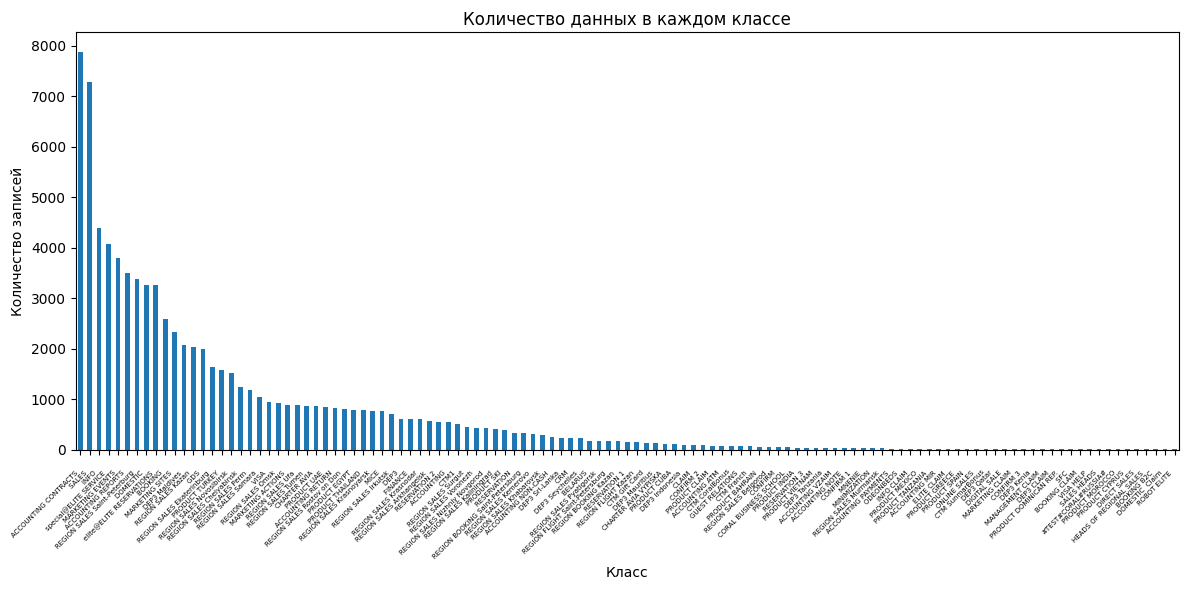

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Путь к файлу
file_path = "/content/drive/MyDrive/Стажировка/Semantic_2/word2vec_results.parquet"

# Загрузка данных из файла
df = pd.read_parquet(file_path)

# Подсчет количества данных в каждом классе
class_counts = df['Portal User Group'].value_counts()

# Построение столбчатой диаграммы
plt.figure(figsize=(12, 6))
class_counts.plot(kind='bar')
plt.title('Количество данных в каждом классе')
plt.xlabel('Класс')
plt.ylabel('Количество записей')

# Настройка меток оси x
plt.xticks(rotation=45, ha='right', fontsize=5)  # Уменьшаем шрифт до 10
plt.gca().xaxis.set_tick_params(pad=10)  # Увеличиваем расстояние между метками и осью

plt.tight_layout()

# Отображение диаграммы
plt.show()


**Подготовка данных**

 Уменьшение объема данных (не хватает объема ОЗУ)

In [ ]:
import pandas as pd

# Путь к файлу
file_path = "/content/drive/MyDrive/Стажировка/Semantic_2/word2vec_results.parquet"
output_file_path = "/content/drive/MyDrive/Стажировка/Semantic_2/word2vec_results_1000.parquet"

# Загрузка данных из файла
df = pd.read_parquet(file_path)

# Перемешивание данных
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Подсчет количества данных в каждом классе
class_counts = df['Portal User Group'].value_counts()

# Определение классов с количеством записей менее или равно 1000
small_classes = class_counts[class_counts <= 1000].index

# Фильтрация данных для сохранения только нужных классов
df_filtered = df[df['Portal User Group'].isin(small_classes) | (df['Portal User Group'].map(class_counts) <= 1000)]

# Сохранение отфильтрованных данных в новый файл
df_filtered.to_parquet(output_file_path, index=False)

print(f"Файл с данными из классов с не более чем 1000 записями сохранен в {output_file_path}.")


Файл с данными из классов с не более чем 1000 записями сохранен в /content/drive/MyDrive/Стажировка/Semantic_2/word2vec_results_1000.parquet.


In [ ]:
!pip install numpy


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import numpy as np

# Путь к файлу
input_file_path = "/content/drive/MyDrive/Стажировка/Semantic_2/word2vec_results_1000.parquet"
output_file_path = "/content/drive/MyDrive/Стажировка/Semantic_2/processed_data.parquet"

# Загрузка данных
df = pd.read_parquet(input_file_path)

# Создание копии DataFrame, чтобы избежать изменений в исходном DataFrame
df_copy = df.copy()

# Определение столбцов для обработки
columns_to_process = [col for col in df_copy.columns if col not in ['Portal User Group', 'portal_user_group_code']]
categorical_features = [col for col in df_copy.columns if df_copy[col].dtype == 'object']

# Применение Label Encoding для портала
le = LabelEncoder()
df_copy['Portal User Group Encoded'] = le.fit_transform(df_copy['Portal User Group'])

# Применение One-Hot Encoding к категориальным признакам
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
X_categorical = encoder.fit_transform(df_copy[categorical_features])

# Применение Standard Scaler к числовым признакам
scaler = StandardScaler()
X_numerical = scaler.fit_transform(df_copy.drop(columns=categorical_features + ['Portal User Group', 'portal_user_group_code']))

# Объединение всех признаков
X_processed = np.hstack((X_numerical, X_categorical))

# Преобразование в DataFrame
processed_cols = [f'feature_{i}' for i in range(X_processed.shape[1])]
X_processed_df = pd.DataFrame(X_processed, columns=processed_cols)

# Объединение с исходными целевыми переменными
processed_df = pd.concat([df_copy[['Portal User Group', 'portal_user_group_code']], X_processed_df], axis=1)

# Сохранение обработанных данных в новый файл Parquet
processed_df.to_parquet(output_file_path, index=False)

print(f"Данные успешно переведены в цифровой формат и сохранены в {output_file_path}.")


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Данные успешно переведены в цифровой формат и сохранены в /content/drive/MyDrive/Стажировка/Semantic_2/processed_data.parquet.


**Подготовка данных для моделирования с учетом стратификации и перемешивания внутри каждого класса.**

Определяем целевую переменную portal_user_group_code.

Признаки (все остальные столбцы, кроме целевой переменной и 'Portal User Group').

Перемешивает данные внутри каждого класса.

Разделение данных на обучающую (70%) и временную (30%) выборки с учетом стратификации. Разделение временной выборки на проверочную (20%) и тестовую (10%) выборки с учетом стратификации.

Удаление столбца Portal User Group из проверочной и тестовой выборок.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import pickle
from tqdm import tqdm

# Активация tqdm для pandas
tqdm.pandas()

# Загрузка данных
combined_data_path = "/content/drive/MyDrive/Стажировка/Semantic_2/processed_data.parquet"
data = pd.read_parquet(combined_data_path)

# Целевая переменная
y = data['portal_user_group_code']

# Признаки (все остальные столбцы, кроме целевой переменной и 'Portal User Group')
X = data.drop(columns=['portal_user_group_code', 'Portal User Group'])

# Перемешивание данных внутри каждого класса
data = pd.concat([X, y], axis=1)
data_shuffled = data.groupby('portal_user_group_code').apply(lambda x: x.sample(frac=1, random_state=42)).reset_index(drop=True)

# Обновление X и y после перемешивания
X = data_shuffled.drop(columns=['portal_user_group_code'])
y = data_shuffled['portal_user_group_code']

# Удаление категорий с менее чем двумя наблюдениями
counts = y.value_counts()
categories_to_remove = counts[counts < 2].index
mask = ~y.isin(categories_to_remove)
X = X[mask]
y = y[mask]

# Повторная проверка после фильтрации
print(f"Число классов после фильтрации: {len(y.unique())}")

# Разделение данных на обучающую (70%) и временную (30%) выборки с учетом стратификации
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Проверка на временной выборке и удаление классов с менее чем двумя элементами
temp_counts = y_temp.value_counts()
temp_categories_to_remove = temp_counts[temp_counts < 2].index
temp_mask = ~y_temp.isin(temp_categories_to_remove)
X_temp = X_temp[temp_mask]
y_temp = y_temp[temp_mask]

# Повторная проверка на временной выборке
print(f"Число классов во временной выборке после фильтрации: {len(y_temp.unique())}")

# Разделение временной выборки на проверочную (20%) и тестовую (10%) выборки
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.3333, random_state=42, stratify=y_temp)

# Удаление классов, которые могут отсутствовать в проверочной или тестовой выборке
common_classes = set(y_train.unique()) & set(y_val.unique()) & set(y_test.unique())

# Фильтрация данных для оставления только общих классов
train_mask = y_train.isin(common_classes)
val_mask = y_val.isin(common_classes)
test_mask = y_test.isin(common_classes)

X_train = X_train[train_mask]
y_train = y_train[train_mask]

X_val = X_val[val_mask]
y_val = y_val[val_mask]

X_test = X_test[test_mask]
y_test = y_test[test_mask]

# Проверка, что набор классов совпадает во всех выборках
train_classes = set(y_train.unique())
val_classes = set(y_val.unique())
test_classes = set(y_test.unique())

assert train_classes == val_classes == test_classes, "Набор классов не совпадает во всех выборках"

print(f"Число классов в обучающей выборке: {len(train_classes)}")
print(f"Число классов в проверочной выборке: {len(val_classes)}")
print(f"Число классов в тестовой выборке: {len(test_classes)}")

# Сохранение данных для обучения, проверки и тестирования
train_test_data_path = "/content/drive/MyDrive/Стажировка/Semantic_2/train_test_data2.pkl"
train_test_data = {
    'X_train': X_train,
    'X_val': X_val,
    'X_test': X_test,
    'y_train': y_train,
    'y_val': y_val,
    'y_test': y_test
}

# Сохранение данных
with open(train_test_data_path, 'wb') as f:
    pickle.dump(train_test_data, f, protocol=pickle.HIGHEST_PROTOCOL)

print("Данные для обучения, проверки и тестирования сохранены в", train_test_data_path)


Число классов после фильтрации: 92
Число классов во временной выборке после фильтрации: 78
Число классов в обучающей выборке: 78
Число классов в проверочной выборке: 78
Число классов в тестовой выборке: 78
Данные для обучения, проверки и тестирования сохранены в /content/drive/MyDrive/Стажировка/Semantic_2/train_test_data2.pkl


**Обучение**

In [ ]:
!pip install tqdm

In [ ]:
import pandas as pd
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer, f1_score
from tqdm import tqdm

# Загрузка данных для обучения и тестирования
train_test_data_path = "/content/drive/MyDrive/Стажировка/Semantic_2/train_test_data2.pkl"
with open(train_test_data_path, 'rb') as f:
    train_test_data = pickle.load(f)

X_train = train_test_data['X_train']
X_val = train_test_data['X_val']
y_train = train_test_data['y_train']
y_val = train_test_data['y_val']

# Масштабирование данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Настройка кросс-валидации и метрики
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scorer = make_scorer(f1_score, average='weighted')

# Определение параметров для поиска
param_grid = {
    'Logistic Regression': {
        'model': LogisticRegression(max_iter=1000, solver='lbfgs', warm_start=True),
        'params': {
            'C': [0.1, 1, 10],
            'penalty': ['l2']
        }
    },
    'Support Vector Machine': {
        'model': SVC(),
        'params': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf']
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [50, 100, 150],
            'max_depth': [None, 10, 20]
        }
    },
    'Gradient Boosting': {
        'model': GradientBoostingClassifier(),
        'params': {
            'n_estimators': [50, 100, 150],
            'learning_rate': [0.01, 0.1, 0.2],
            'subsample': [0.8, 1.0]
        }
    }
}

# Обучение моделей с использованием кросс-валидации
trained_models = {}

for model_name, mp in tqdm(param_grid.items(), desc="Training models with GridSearchCV"):
    print(f"Training {model_name} with cross-validation...")
    grid_search = GridSearchCV(estimator=mp['model'], param_grid=mp['params'], scoring=scorer, cv=cv, n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train)
    trained_models[model_name] = grid_search.best_estimator_
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")

# Сохранение обученных моделей после обучения
trained_models_path = "/content/drive/MyDrive/Стажировка/Semantic_2/trained_models_with_cv.pkl"
with open(trained_models_path, 'wb') as f:
    pickle.dump(trained_models, f, protocol=pickle.HIGHEST_PROTOCOL)

print("Обученные модели сохранены в", trained_models_path)


*Сбой по ОЗУ*

**Код для обучения моделей с использованием dask**

In [ ]:
!pip install dask[complete] dask-ml


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.8/149.8 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 25.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.9/241.9 kB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 237.3/237.3 kB 17.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import pickle
import dask.array as da
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score
from dask_ml.model_selection import train_test_split as dask_train_test_split
from dask.distributed import Client
from tqdm import tqdm

# Установка клиента Dask
client = Client(memory_limit='4GB')

# Загрузка данных для обучения и тестирования
train_test_data_path = "/content/drive/MyDrive/Стажировка/Semantic_2/train_test_data2.pkl"
with open(train_test_data_path, 'rb') as f:
    train_test_data = pickle.load(f)

X_train = train_test_data['X_train']
X_val = train_test_data['X_val']
y_train = train_test_data['y_train']
y_val = train_test_data['y_val']

# Преобразование целевой переменной в числовой формат, если необходимо
if y_train.dtype == 'object':
    le = LabelEncoder()
    y_train = le.fit_transform(y_train)
    y_val = le.transform(y_val)

# Масштабирование данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Преобразование данных в Dask массивы
X_train_scaled = da.from_array(X_train_scaled, chunks='auto')
X_val_scaled = da.from_array(X_val_scaled, chunks='auto')
y_train = da.from_array(y_train, chunks='auto')
y_val = da.from_array(y_val, chunks='auto')

# Настройка кросс-валидации и метрики
scorer = make_scorer(f1_score, average='weighted')

# Определение параметров для поиска
param_grid = {
    'Logistic Regression': {
        'model': LogisticRegression(max_iter=1000, solver='lbfgs', warm_start=True),
        'params': {
            'C': [0.1, 1, 10],
            'penalty': ['l2']
        }
    },
    'Support Vector Machine': {
        'model': SVC(),
        'params': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf']
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [50, 100, 150],
            'max_depth': [None, 10, 20]
        }
    },
    'Gradient Boosting': {
        'model': GradientBoostingClassifier(),
        'params': {
            'n_estimators': [50, 100, 150],
            'learning_rate': [0.01, 0.1, 0.2],
            'subsample': [0.8, 1.0]
        }
    }
}

# Обучение моделей с использованием кросс-валидации
trained_models = {}

for model_name, mp in tqdm(param_grid.items(), desc="Training models with GridSearchCV"):
    print(f"Training {model_name} with cross-validation...")
    grid_search = GridSearchCV(estimator=mp['model'], param_grid=mp['params'], scoring=scorer, cv=5, n_jobs=-1)
    grid_search.fit(X_train_scaled.compute(), y_train.compute())
    trained_models[model_name] = grid_search.best_estimator_
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")

# Сохранение обученных моделей после обучения
trained_models_path = "/content/drive/MyDrive/Стажировка/Semantic_2/trained_models_with_cv.pkl"
with open(trained_models_path, 'wb') as f:
    pickle.dump(trained_models, f, protocol=pickle.HIGHEST_PROTOCOL)

print("Обученные модели сохранены в", trained_models_path)


INFO:distributed.http.proxy:To route to workers diagnostics web server please install jupyter-server-proxy: python -m pip install jupyter-server-proxy
INFO:distributed.scheduler:State start
INFO:distributed.scheduler:  Scheduler at:     tcp://127.0.0.1:35115
INFO:distributed.scheduler:  dashboard at:  http://127.0.0.1:8787/status
INFO:distributed.scheduler:Registering Worker plugin shuffle
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:39889'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:42313'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:33621'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:44375'
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://127.0.0.1:36413', name: 3, status: init, memory: 0, processing: 0>
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:36413
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:38646
INFO:distributed.scheduler:Regist

Объем ОЗУ исчерпан (51G)

**Оценка моделей**

**Классификация с использованием BERT.**

In [ ]:
!pip install transformers
!pip install torch
!pip install sklearn


Подготовка и сохранение данных.

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
import numpy as np

# Путь к файлу
input_file_path = "/content/drive/MyDrive/Стажировка/Semantic_2/word2vec_results_1000.parquet"
output_file_path = "/content/drive/MyDrive/Стажировка/Semantic_2/combined_features.parquet"

# Загрузка данных
df = pd.read_parquet(input_file_path)

# Создание копии DataFrame, чтобы избежать изменений в исходном DataFrame
df_copy = df.copy()

# Определение столбцов для обработки
columns_to_process = [col for col in df_copy.columns if col not in ['Portal User Group', 'portal_user_group_code']]
categorical_features = [col for col in df_copy.columns if df_copy[col].dtype == 'object']

# Применение Label Encoding для портала
le = LabelEncoder()
df_copy['Portal User Group Encoded'] = le.fit_transform(df_copy['Portal User Group'])

# Применение One-Hot Encoding к категориальным признакам
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
X_categorical = encoder.fit_transform(df_copy[categorical_features])

# Применение Standard Scaler к числовым признакам
scaler = StandardScaler()
X_numerical = scaler.fit_transform(df_copy.drop(columns=categorical_features + ['Portal User Group', 'portal_user_group_code']))

# Объединение всех признаков
X_processed = np.hstack((X_numerical, X_categorical))

# Преобразование в DataFrame
processed_cols = [f'feature_{i}' for i in range(X_processed.shape[1])]
X_processed_df = pd.DataFrame(X_processed, columns=processed_cols)

# Объединение с исходными целевыми переменными
combined_df = pd.concat([df_copy[['Portal User Group', 'portal_user_group_code', 'Description']], X_processed_df], axis=1)

# Сохранение обработанных данных в новый файл Parquet
combined_df.to_parquet(output_file_path, index=False)

print(f"Обработанные данные сохранены в {output_file_path}.")


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Обработанные данные сохранены в /content/drive/MyDrive/Стажировка/Semantic_2/combined_features.parquet.


Объединение признаков и разделение данных.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import pickle

# Путь к файлам
input_file_path = "/content/drive/MyDrive/Стажировка/Semantic_2/combined_features.parquet"
train_test_data_path = "/content/drive/MyDrive/Стажировка/Semantic_2/train_test_data.pkl"

# Загрузка данных
df = pd.read_parquet(input_file_path)

# Определение целевой переменной и признаков
y = df['portal_user_group_code']
X = df.drop(columns=['portal_user_group_code'])

# Перемешивание данных внутри каждого класса
data = pd.concat([X, y], axis=1)
data_shuffled = data.groupby('portal_user_group_code').apply(lambda x: x.sample(frac=1, random_state=42)).reset_index(drop=True)

# Обновление X и y после перемешивания
X = data_shuffled.drop(columns=['portal_user_group_code'])
y = data_shuffled['portal_user_group_code']

# Удаление категорий с менее чем двумя наблюдениями
counts = y.value_counts()
categories_to_remove = counts[counts < 2].index
mask = ~y.isin(categories_to_remove)
X = X[mask]
y = y[mask]

# Разделение данных на обучающую (70%) и временную (30%) выборки с учетом стратификации
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Проверка на временной выборке и удаление классов с менее чем двумя элементами
temp_counts = y_temp.value_counts()
temp_categories_to_remove = temp_counts[temp_counts < 2].index
temp_mask = ~y_temp.isin(temp_categories_to_remove)
X_temp = X_temp[temp_mask]
y_temp = y_temp[temp_mask]

# Разделение временной выборки на проверочную (20%) и тестовую (10%) выборки с учетом стратификации
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.3333, random_state=42, stratify=y_temp)

# Удаление столбца Portal User Group из проверочной и тестовой выборок
X_val = X_val.drop(columns=['Portal User Group'])
X_test = X_test.drop(columns=['Portal User Group'])

# Сохранение данных для обучения, проверки и тестирования
train_test_data = {
    'X_train': X_train,
    'X_val': X_val,
    'X_test': X_test,
    'y_train': y_train,
    'y_val': y_val,
    'y_test': y_test
}

with open(train_test_data_path, 'wb') as f:
    pickle.dump(train_test_data, f, protocol=pickle.HIGHEST_PROTOCOL)

print("Данные для обучения, проверки и тестирования сохранены в", train_test_data_path)


Данные для обучения, проверки и тестирования сохранены в /content/drive/MyDrive/Стажировка/Semantic_2/train_test_data.pkl


In [ ]:
import os

# Путь к файлу
train_test_data_path = "/content/drive/MyDrive/Стажировка/Semantic_2/train_test_data.pkl"

# Проверка существования файла
if os.path.exists(train_test_data_path):
    print(f"Файл успешно сохранен в {train_test_data_path}")
else:
    print("Ошибка: файл не найден!")


Файл успешно сохранен в /content/drive/MyDrive/Стажировка/Semantic_2/train_test_data.pkl


Обучение модели.

In [ ]:
import torch
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler, TensorDataset
from transformers import BertForSequenceClassification, BertTokenizer, AdamW
from tqdm import tqdm
import torch_xla
import torch_xla.core.xla_model as xm
import pickle
from sklearn.preprocessing import LabelEncoder

# Подключение к TPU
device = xm.xla_device()

# Загрузка данных для обучения и тестирования
train_test_data_path = "/content/drive/MyDrive/Стажировка/Semantic_2/train_test_data.pkl"
with open(train_test_data_path, 'rb') as f:
    train_test_data = pickle.load(f)

X_train = train_test_data['X_train']
X_val = train_test_data['X_val']
y_train = train_test_data['y_train']
y_val = train_test_data['y_val']

# Кодирование целевой переменной
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

# Инициализация токенизатора BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Функция для токенизации текста и преобразования в тензоры
def tokenize_data(texts, tokenizer, max_length=128):
    input_ids = []
    attention_masks = []

    for text in texts:
        encoded = tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=max_length,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt'
        )
        input_ids.append(encoded['input_ids'])
        attention_masks.append(encoded['attention_mask'])

    return torch.cat(input_ids, dim=0), torch.cat(attention_masks, dim=0)

# Предполагается, что X_train и X_val содержат текстовые данные
train_input_ids, train_attention_masks = tokenize_data(X_train['Description'].tolist(), tokenizer)
val_input_ids, val_attention_masks = tokenize_data(X_val['Description'].tolist(), tokenizer)

# Преобразование целевой переменной в тензоры
train_labels = torch.tensor(y_train_encoded, dtype=torch.long)
val_labels = torch.tensor(y_val_encoded, dtype=torch.long)

# Инициализация модели BERT для классификации
model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased",
    num_labels=len(label_encoder.classes_),
    output_attentions=False,
    output_hidden_states=False
)

# Перемещение модели на TPU
model.to(device)

# Подготовка данных для DataLoader
batch_size = 16

train_data = TensorDataset(train_input_ids, train_attention_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

val_data = TensorDataset(val_input_ids, val_attention_masks, val_labels)
val_sampler = SequentialSampler(val_data)
val_dataloader = DataLoader(val_data, sampler=val_sampler, batch_size=batch_size)

# Оптимизатор
optimizer = AdamW(model.parameters(), lr=2e-5, eps=1e-8)

# Функция для обучения модели
def train_bert_model(model, train_dataloader, optimizer, device, epochs=4):
    model.train()
    for epoch in range(epochs):
        print(f'Epoch {epoch + 1}/{epochs}')
        for step, batch in enumerate(train_dataloader):
            b_input_ids, b_input_mask, b_labels = tuple(t.to(device) for t in batch)
            model.zero_grad()
            outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask, labels=b_labels)
            loss = outputs.loss
            loss.backward()

            # Обновление TPU
            xm.optimizer_step(optimizer, barrier=True)

            if step % 10 == 0:
                print(f'Step {step}, Loss: {loss.item()}')

# Обучение модели
train_bert_model(model, train_dataloader, optimizer, device)

# Сохранение обученной модели
model_path = "/content/drive/MyDrive/Стажировка/Semantic_2/bert_model.pt"
torch.save(model.state_dict(), model_path)
print(f"Обученная модель сохранена в {model_path}")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1/4
Step 0, Loss: 4.672741413116455
Step 10, Loss: 4.303689479827881
Step 20, Loss: 4.407902240753174
Step 30, Loss: 4.600595474243164
Step 40, Loss: 4.338414669036865
Step 50, Loss: 4.277536392211914
Step 60, Loss: 4.212313652038574
Step 70, Loss: 4.110607624053955
Step 80, Loss: 4.228647232055664
Step 90, Loss: 4.012503623962402
Step 100, Loss: 3.908782958984375
Step 110, Loss: 3.9301388263702393
Step 120, Loss: 4.119160175323486
Step 130, Loss: 3.861030340194702
Step 140, Loss: 3.887394905090332
Step 150, Loss: 4.100200653076172
Step 160, Loss: 3.7686657905578613
Step 170, Loss: 3.9471733570098877
Step 180, Loss: 3.749842882156372
Step 190, Loss: 3.7363052368164062
Step 200, Loss: 4.100580215454102
Step 210, Loss: 4.143734931945801
Step 220, Loss: 3.9507994651794434
Step 230, Loss: 3.8210816383361816
Step 240, Loss: 3.8649425506591797
Step 250, Loss: 3.699031114578247
Step 260, Loss: 3.847165584564209
Step 270, Loss: 3.8158793449401855
Step 280, Loss: 3.8067994117736816
Step 2

Оценка модели.

In [ ]:
import torch
from sklearn.metrics import classification_report

# Функция для оценки модели
def evaluate_bert_model(model, val_dataloader, device):
    model.eval()  # Переключение модели в режим оценки
    predictions, true_labels = [], []

    # Без вычисления градиентов для ускорения и экономии памяти
    with torch.no_grad():
        for batch in val_dataloader:
            # Перенос данных на устройство
            b_input_ids, b_input_mask, b_labels = tuple(t.to(device) for t in batch)

            # Получение логитов от модели
            outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)
            logits = outputs.logits

            # Определение предсказанных меток
            predictions.extend(torch.argmax(logits, dim=1).tolist())
            true_labels.extend(b_labels.tolist())

    return predictions, true_labels

# Оценка модели
val_predictions, val_true_labels = evaluate_bert_model(model, val_dataloader, device)

# Получение уникальных классов в проверочной выборке
unique_classes = sorted(set(val_true_labels))

# Проверка и вывод отчета по метрикам
if len(val_predictions) == len(val_true_labels):
    report = classification_report(
        val_true_labels,
        val_predictions,
        labels=unique_classes,
        target_names=[str(i) for i in unique_classes]
    )
    print(report)
else:
    print("Ошибка: количество предсказаний и истинных меток не совпадает.")


              precision    recall  f1-score   support

           0       0.54      0.76      0.63       177
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
          10       0.45      0.50      0.47       109
          11       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         2
          17       0.59      0.85      0.70        26
          18       0.00      0.00      0.00         2
          19       0.78      0.89      0.83        47
          20       0.75      0.84      0.79        45
          21       0.00      0.00      0.00        58
          22       1.00      0.09      0.17        11
          23       0.00      0.00      0.00        33
          24       0.72      0.55      0.62        33
          25       0.65      0.89      0.75       187
          26       0.00      0.00      0.00        61
          27       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<function matplotlib.pyplot.show(close=None, block=None)>

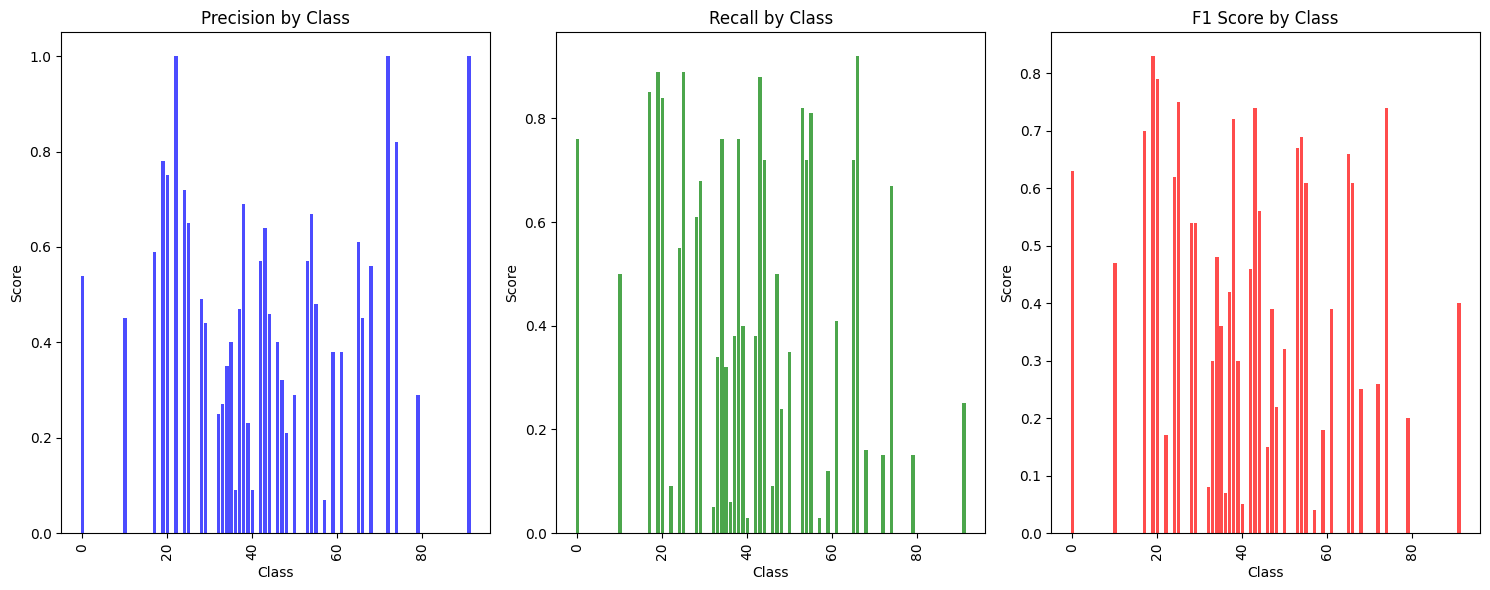

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Данные метрик по классам
classes = np.array([
    0, 4, 5, 10, 11, 14, 15, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39,
    40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
    70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 89, 90, 91
])

precision = np.array([
    0.54, 0.00, 0.00, 0.45, 0.00, 0.00, 0.00, 0.59, 0.00, 0.78, 0.75, 0.00, 1.00, 0.00, 0.72, 0.65, 0.00, 0.00, 0.49,
    0.44, 0.00, 0.00, 0.25, 0.27, 0.35, 0.40, 0.09, 0.47, 0.69, 0.23, 0.09, 0.00, 0.57, 0.64, 0.46, 0.00, 0.40, 0.32,
    0.21, 0.00, 0.29, 0.00, 0.00, 0.57, 0.67, 0.48, 0.00, 0.07, 0.00, 0.38, 0.00, 0.38, 0.00, 0.00, 0.00, 0.61, 0.45,
    0.00, 0.56, 0.00, 0.00, 1.00, 0.00, 0.82, 0.00, 0.00, 0.00, 0.00, 0.29, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00,
    0.00, 1.00
])

recall = np.array([
    0.76, 0.00, 0.00, 0.50, 0.00, 0.00, 0.00, 0.85, 0.00, 0.89, 0.84, 0.00, 0.09, 0.00, 0.55, 0.89, 0.00, 0.00, 0.61,
    0.68, 0.00, 0.00, 0.05, 0.34, 0.76, 0.32, 0.06, 0.38, 0.76, 0.40, 0.03, 0.00, 0.38, 0.88, 0.72, 0.00, 0.09, 0.50,
    0.24, 0.00, 0.35, 0.00, 0.00, 0.82, 0.72, 0.81, 0.00, 0.03, 0.00, 0.12, 0.00, 0.41, 0.00, 0.00, 0.00, 0.72, 0.92,
    0.00, 0.16, 0.00, 0.00, 0.15, 0.00, 0.67, 0.00, 0.00, 0.00, 0.00, 0.15, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00,
    0.00, 0.25
])

f1_score = np.array([
    0.63, 0.00, 0.00, 0.47, 0.00, 0.00, 0.00, 0.70, 0.00, 0.83, 0.79, 0.00, 0.17, 0.00, 0.62, 0.75, 0.00, 0.00, 0.54,
    0.54, 0.00, 0.00, 0.08, 0.30, 0.48, 0.36, 0.07, 0.42, 0.72, 0.30, 0.05, 0.00, 0.46, 0.74, 0.56, 0.00, 0.15, 0.39,
    0.22, 0.00, 0.32, 0.00, 0.00, 0.67, 0.69, 0.61, 0.00, 0.04, 0.00, 0.18, 0.00, 0.39, 0.00, 0.00, 0.00, 0.66, 0.61,
    0.00, 0.25, 0.00, 0.00, 0.26, 0.00, 0.74, 0.00, 0.00, 0.00, 0.00, 0.20, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00,
    0.00, 0.40
])

support = np.array([
    177, 1, 1, 109, 1, 1, 2, 26, 2, 47, 45, 58, 11, 33, 33, 187, 61, 115, 122, 171, 32, 4, 65, 175, 119, 141, 17, 100,
    29, 173, 119, 85, 21, 163, 47, 35, 90, 185, 151, 85, 65, 15, 21, 151, 25, 168, 5, 161, 9, 51, 7, 111, 2, 15, 6, 155,
    155, 17, 31, 1, 13, 79, 19, 75, 7, 2, 5, 2, 13, 7, 8, 16, 3, 8, 2, 8, 8, 4
])

# Построение графиков
plt.figure(figsize=(15, 6))

# График точности
plt.subplot(1, 3, 1)
plt.bar(classes, precision, color='b', alpha=0.7, label='Precision')
plt.xlabel('Class')
plt.ylabel('Score')
plt.title('Precision by Class')
plt.xticks(rotation=90)

# График полноты
plt.subplot(1, 3, 2)
plt.bar(classes, recall, color='g', alpha=0.7, label='Recall')
plt.xlabel('Class')
plt.ylabel('Score')
plt.title('Recall by Class')
plt.xticks(rotation=90)

# График F1-оценки
plt.subplot(1, 3, 3)
plt.bar(classes, f1_score, color='r', alpha=0.7, label='F1 Score')
plt.xlabel('Class')
plt.ylabel('Score')
plt.title('F1 Score by Class')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show


In [ ]:
import pandas as pd

# Путь к файлу
file_path = "/content/drive/MyDrive/Стажировка/Semantic_2/processed_data.parquet"

# Загрузка данных из файла
df = pd.read_parquet(file_path)

# Удаление дубликатов, чтобы отображать уникальные пары названий классов и их кодов
unique_classes = df[['Portal User Group', 'portal_user_group_code']].drop_duplicates()

# Убедитесь, что коды классов являются числами
unique_classes['portal_user_group_code'] = unique_classes['portal_user_group_code'].astype(int)

# Сортировка по коду класса
unique_classes = unique_classes.sort_values(by='portal_user_group_code')

# Вывод на экран с выравниванием
print(f"{'Class Name':<50} {'Class Code'}")
print("-" * 60)
for _, row in unique_classes.iterrows():
    print(f"{row['Portal User Group']:<50} {row['portal_user_group_code']:>10}")


Class Name                                         Class Code
------------------------------------------------------------
MARKETING ACTIONS                                           1
DEP3                                                        3
DEP3 Sri-Lanka                                              5
MICE                                                        6
INFO CLAIM                                                  7
PRODUCT CLAIM                                               9
ACCOUNTING                                                 11
MANAGEMENT CLAIM                                           12
CTM Gift Card                                              14
ELITE CLAIM                                                16
CRM                                                        17
DEP3 Seychelles                                            18
REGION SALES Khabarovsk                                    21
PRODUCT BAHRAIN                                            23
REGION SA

## Основные метрики

1. **Precision (Точность)**: Это доля правильно предсказанных положительных наблюдений среди всех предсказанных положительных наблюдений. Высокая точность означает, что модель редко предсказывает положительный класс ошибочно.

   - Формула: \(\text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}}\)

2. **Recall (Полнота)**: Это доля правильно предсказанных положительных наблюдений среди всех фактически положительных наблюдений. Высокая полнота означает, что модель захватывает большинство положительных случаев.

   - Формула: \(\text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}\)

3. **F1-score**: Это среднее гармоническое значение точности и полноты. F1-score учитывает как ложные положительные, так и ложные отрицательные срабатывания, и особенно полезен, когда классы не сбалансированы.

   - Формула: \(\text{F1} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}\)

4. **Support (Поддержка)**: Это количество истинных вхождений каждого класса в валидационной выборке. Оно показывает, насколько класс представлен в данных.

### Интерпретация результатов

- **Точность (Precision)** и **Полнота (Recall)** для большинства классов близки к нулю, что указывает на проблемы с точностью и полнотой предсказаний модели. Это часто бывает, если модель не обучена должным образом или классы не сбалансированы.
  
- **F1-score** низкий для большинства классов, что указывает на низкую согласованность между точностью и полнотой.
  
- Некоторые классы имеют F1-score выше, например, класс `19`, `20`, `25`, что говорит о том, что для этих классов модель работает лучше.

- **Support** показывает, что у вас есть классы с очень малым количеством данных (например, 1 или 2), что может вызвать проблемы в обучении, так как модель может не иметь достаточных данных для обучения по этим классам.

- **Accuracy (Точность классификации)**: 0.45, что означает, что модель правильно предсказала около 45% всех данных. Это довольно низкое значение для многих приложений, но может быть приемлемым в некоторых случаях в зависимости от задачи и сложности.

- **Macro avg** и **Weighted avg**: Эти средние значения вычисляются для всех классов. Макро-среднее (`macro avg`) берет среднее значение по всем классам, не взвешивая их по численности. Взвешенное среднее (`weighted avg`) учитывает поддержку (численность) каждого класса.

### Заключение

1. **Низкая точность и полнота** для большинства классов свидетельствуют о том, что модель может нуждаться в доработке или пересмотре подхода к обучению. Это может включать улучшение данных, увеличение количества данных или применение других методов предобработки.

2. **Классы с низкой поддержкой**: Такие классы следует пересмотреть. Возможно, их стоит исключить из обучения, если они не представляют интерес, или необходимо добавить больше данных для этих классов.

3. **Дисбаланс классов**: Попробуйте использовать методы борьбы с дисбалансом классов, такие как взвешенные потери или oversampling/undersampling.

**Общий план для классификации текстов.**
1. Загрузка данных.
2. Предобработка данных.
3. Очистка и нормализация текста с помощью pymorphy2.

Токенизация
* Определение границ предложений и словоформ.
* Используется SpaCy.

Лексический анализ
* Идентификация семантически и синтаксически значимых последовательностей.
* Используется SpaCy.

Морфологический анализ
* Определение вероятных лемм для каждой словоформы, стемминг.
* Используется SpaCy.

Синтаксический анализ
* Определение границ именных и глагольных групп, числовых и вводных конструкций.
* Установление связей между группами.
* Используется SpaCy.

Семантический анализ
* Выделение сущностей, построение семантической сети, фильтрация контента.
* Извлечение мнений, анализ тональности.
* Используется SpaCy.

4. Преобразование текста в числовые представления

Bag of Words (BoW)
* Представление текста в виде вектора, где каждый элемент соответствует количеству вхождений определенного слова.
* Используются Scikit-learn.

TF-IDF
* Взвешивание слов в зависимости от их частоты в документе и в корпусе текстов.
* Используются TfidfVectorizer из библиотеки Scikit-learn.

Word Embeddings
* Представление слов в виде плотных векторов, которые учитывают контекст.
* Используются предобученные модели, такие как Word2Vec.

5. Построение и обучение модели.

6. Оценка модели.

7. Мультиклассовая классификация с использованием BERT
* Загрузка предобученной модели BERT.
* Токенизация текста с использованием BERT.
 *Обучение модели на размеченных данных.
* Предсказание классов для новых текстов.